#  Proyecto Statical Learning I

##### Stefanie Alvarez - 20002045
##### Kimberly Rivera   - 20001676
##### Gladys Rodríguez  - 20006107

###### [Video Presentación](https://www.youtube.com/watch?v=zyF2NFxSpaM)

### Librerías a utilizar

In [4]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## para hacer gráficos
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)

# Para las distribuciones 
import scipy.stats as ss
from scipy.stats import expon

# Para best fit

from fitter import Fitter
import fitter

# Feature Scaling
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos de clasificacion
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score

from sklearn.utils import resample

#Calculo la precisión del modelo
from sklearn.metrics import precision_score
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
#Calculo el Puntaje del modelo
from sklearn.metrics import f1_score
#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score


# Grafica modelos
# from Plotting_Decision_Boundaries import plotting_db

### Carga Dataset

In [5]:
df = pd.read_csv("data.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/05/2019,13:08,Ewallet,NaN,26.1415,9.1
1,226-31-3081,C,NaN,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/08/2019,10:29,NaN,NaN,3.8200,NaN
2,631-41-3108,A,NaN,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/03/2019,13:23,Credit card,NaN,16.2155,7.4
3,123-19-1176,A,NaN,NaN,Male,Health and beauty,58.22,NaN,NaN,489.0480,1/27/2019,20:33,Ewallet,NaN,23.2880,8.4
4,373-73-7910,A,NaN,NaN,NaN,Sports and travel,86.31,7.0,30.2085,NaN,2/08/2019,10:37,NaN,NaN,NaN,NaN


In [6]:
## Cantidad de filas y columnas
df.shape

(1000, 16)

## Minería de datos

##### Análisis de variables numéricas

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,764.000000,764.000000,980.000000,45.000000,928.000000,690.000000
mean,55.672130,5.530105,15.699050,322.404011,246.669333,15.267117,6.973623
std,26.494628,2.893095,11.752953,245.827140,233.185360,11.718982,1.709191
min,10.080000,1.000000,0.508500,10.678500,31.900000,0.508500,4.000000
25%,32.875000,3.000000,6.172875,122.511375,86.500000,5.789750,5.500000
50%,55.230000,6.000000,12.782750,253.386000,145.560000,12.042000,6.950000
75%,77.935000,8.000000,22.789750,470.998500,322.200000,22.380750,8.475000
max,99.960000,10.000000,49.490000,1042.650000,985.200000,49.650000,10.000000


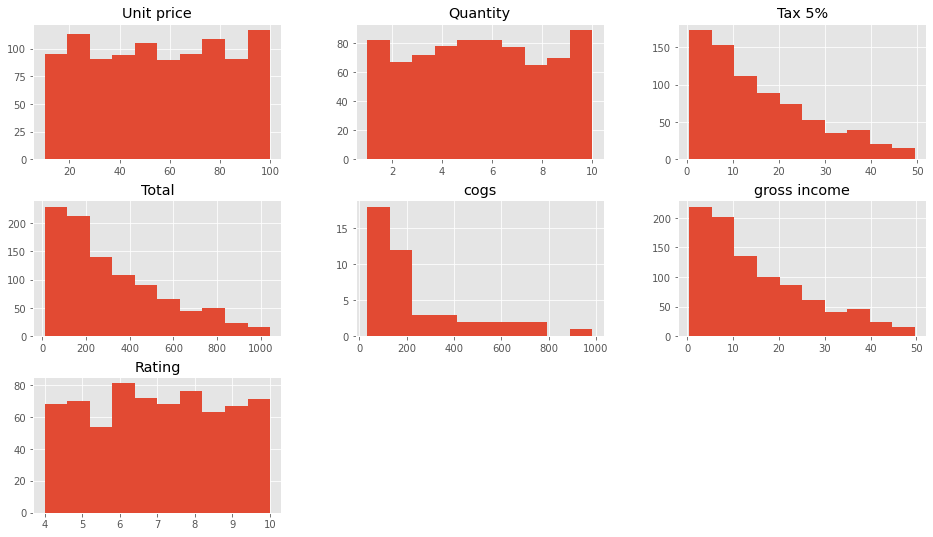

In [8]:
df.hist()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


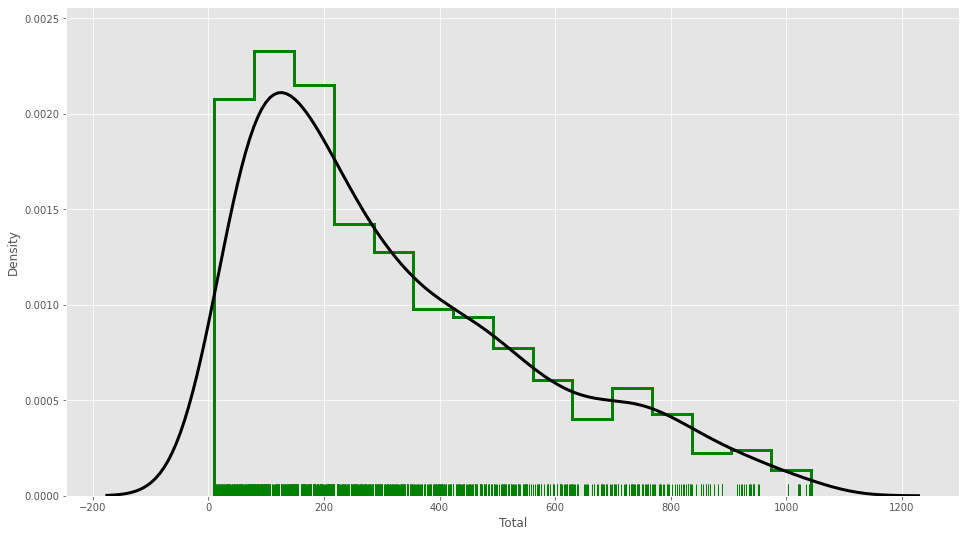

In [9]:
ax = sns.distplot(df['Total'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

##### Análisis de variables catergóricas

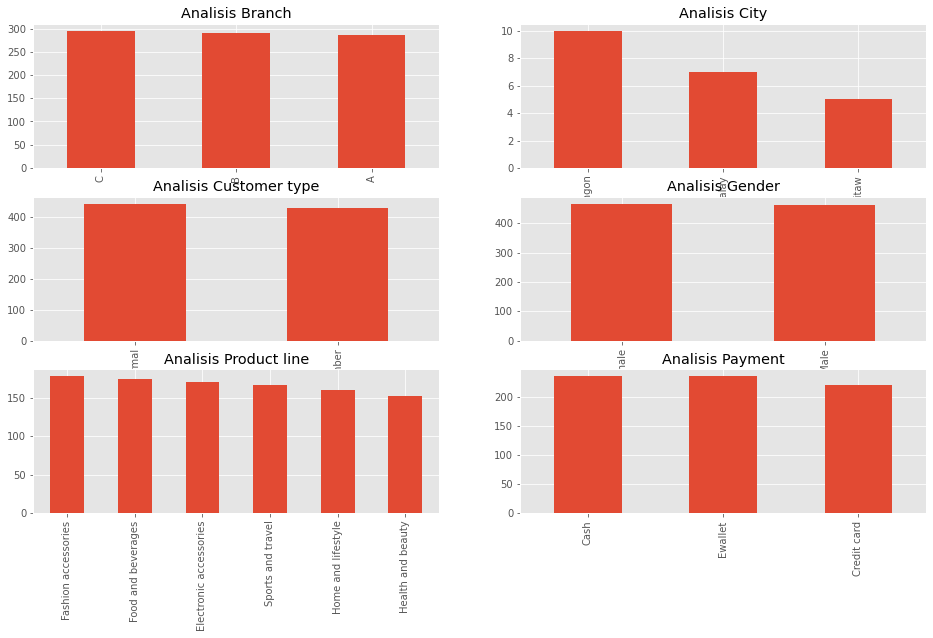

In [10]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2)

ax0.set_title("Analisis Branch")
df['Branch'].value_counts().plot(kind='bar', ax=ax0)

ax1.set_title("Analisis City")
df['City'].value_counts().plot(kind='bar', ax=ax1)

ax2.set_title("Analisis Customer type")
df['Customer type'].value_counts().plot(kind='bar', ax=ax2)

ax3.set_title("Analisis Gender")
df['Gender'].value_counts().plot(kind='bar', ax=ax3)

ax4.set_title("Analisis Product line")
df['Product line'].value_counts().plot(kind='bar', ax=ax4)

ax5.set_title("Analisis Payment")
df['Payment'].value_counts().plot(kind='bar', ax=ax5)

plt.show()

## Ingeniería de Características

In [11]:
# Determinado columnas con faltantes
colsNA = [col for col in df.columns if df[col].isnull().mean() > 0]
colsNA

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Quantity',
 'Tax 5%',
 'Total',
 'Payment',
 'cogs',
 'gross income',
 'Rating']

In [12]:
# Verificando % de nulos en columnas con NA

colsNA = df[colsNA].isnull().mean()
colsNA

Branch           0.127
City             0.978
Customer type    0.126
Gender           0.072
Quantity         0.236
Tax 5%           0.236
Total            0.020
Payment          0.310
cogs             0.955
gross income     0.072
Rating           0.310
dtype: float64

In [13]:
# Seleccionando cols a usar
dataNA = df[['Branch', 'Customer type', 'Gender', 'Unit price', 'Quantity', 'Total', 'Payment', 'gross income', 'Rating']]
dataNA.head()

,Branch,Customer type,Gender,Unit price,Quantity,Total,Payment,gross income,Rating
0,A,Member,Female,74.69,7.0,548.9715,Ewallet,26.1415,9.1
1,C,Normal,Female,15.28,5.0,80.2200,NaN,3.8200,NaN
2,A,Normal,Male,46.33,7.0,340.5255,Credit card,16.2155,7.4
3,A,NaN,Male,58.22,NaN,489.0480,Ewallet,23.2880,8.4
4,A,NaN,NaN,86.31,7.0,NaN,NaN,NaN,NaN


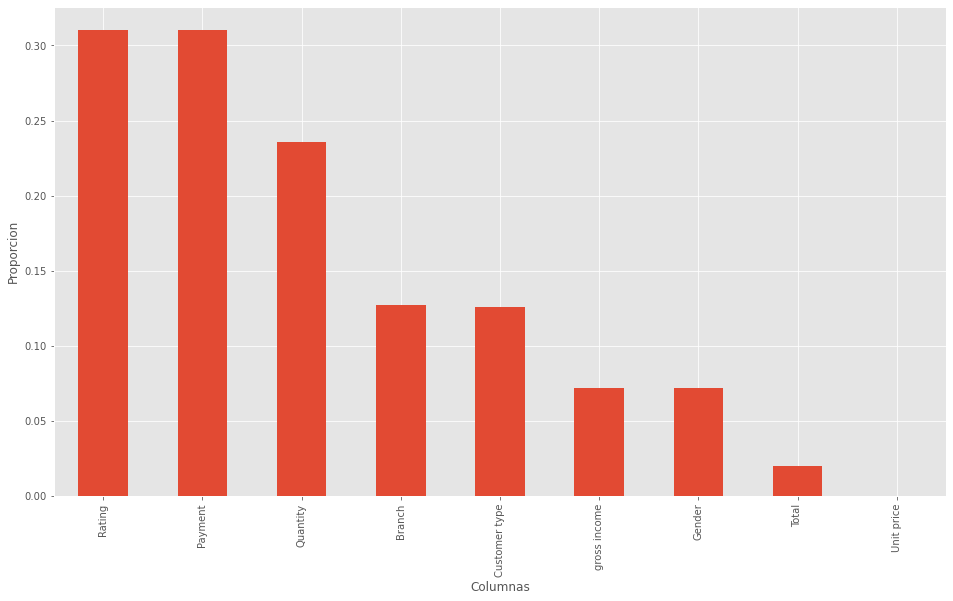

In [14]:
dataNA.isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Proporcion")
plt.xlabel("Columnas")
plt.show()

#### Variables Numéricas

In [15]:
#creacion de listas para almacenar valores

listaCol = []
listaVOrig = []
listaCol = ['Quantity', 'Total', 'gross income', 'Rating']
listaVOrig = []
listaMedia = []
listaMediana = []
listaMin = []
listaMax = []
listaFun = []

###### Imputación Media/Mediana

<ipython-input-16-2d5993ed8b05>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNA['Quantity_media'] = dataNA['Quantity'].fillna(media)
<ipython-input-16-2d5993ed8b05>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNA['Quantity_mediana'] = dataNA['Quantity'].fillna(mediana)


Varianza Original:  8.369996843542625
Varianza Media:  6.392700291914965
Varianza Mediana:  6.432551551551548


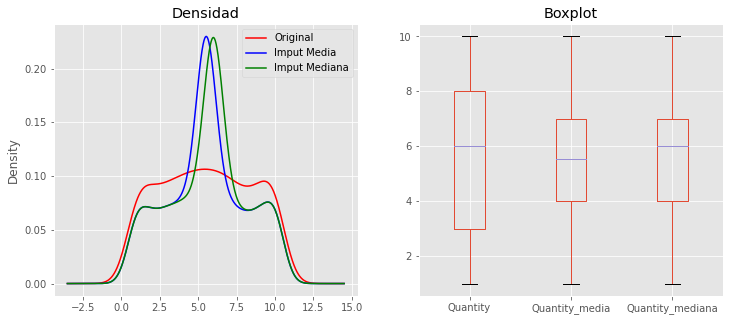

In [16]:
# Quantity

# Media
media = dataNA['Quantity'].mean()

# Mediana
mediana = dataNA['Quantity'].median()

# Nuevas columnas

dataNA['Quantity_media'] = dataNA['Quantity'].fillna(media)
dataNA['Quantity_mediana'] = dataNA['Quantity'].fillna(mediana)
dataNA

# Calculo varianza
vOrg = dataNA['Quantity'].var()
vMed = dataNA['Quantity_media'].var()
vMediana = dataNA['Quantity_mediana'].var()

print('Varianza Original: ', vOrg)
print('Varianza Media: ', vMed)
print('Varianza Mediana: ', vMediana)

#Valores a dataframe
listaVOrig.append(str(vOrg))
listaMedia.append(str(vMed))
listaMediana.append(str(vMediana))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Quantity'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Quantity_media'].plot.density(color='blue', label="Imput Media", ax=ax1)
dataNA['Quantity_mediana'].plot.density(color='green', label="Imput Mediana", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Quantity','Quantity_media','Quantity_mediana']].boxplot(ax=ax2)

ax1.legend()
plt.show()


<ipython-input-17-3c32397bc453>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNA['Total_media'] = dataNA['Total'].fillna(media)
<ipython-input-17-3c32397bc453>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNA['Total_mediana'] = dataNA['Total'].fillna(mediana)


Varianza Original:  60430.982568832536
Varianza Media:  59221.15308797504
Varianza Mediana:  59314.61086749256


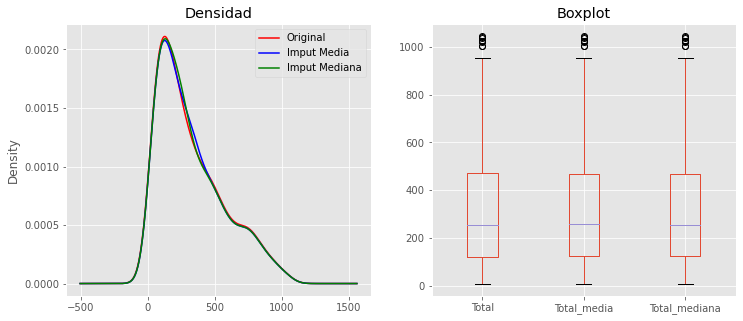

In [17]:
# Total

# Media
media = dataNA['Total'].mean()

# Mediana
mediana = dataNA['Total'].median()

# Nuevas columnas

dataNA['Total_media'] = dataNA['Total'].fillna(media)
dataNA['Total_mediana'] = dataNA['Total'].fillna(mediana)
dataNA

# Calculo varianza
vOrg = dataNA['Total'].var()
vMed = dataNA['Total_media'].var()
vMediana = dataNA['Total_mediana'].var()

print('Varianza Original: ', vOrg)
print('Varianza Media: ', vMed)
print('Varianza Mediana: ', vMediana)

#Valores a dataframe
listaVOrig.append(str(vOrg))
listaMedia.append(str(vMed))
listaMediana.append(str(vMediana))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Total'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Total_media'].plot.density(color='blue', label="Imput Media", ax=ax1)
dataNA['Total_mediana'].plot.density(color='green', label="Imput Mediana", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Total','Total_media','Total_mediana']].boxplot(ax=ax2)

ax1.legend()
plt.show()


<ipython-input-18-5fce3ff7113f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNA['gross income_media'] = dataNA['gross income'].fillna(media)
<ipython-input-18-5fce3ff7113f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNA['gross income_mediana'] = dataNA['gross income'].fillna(mediana)


Varianza Original:  137.3345425935246
Varianza Media:  127.43655754173905
Varianza Mediana:  128.13223199671594


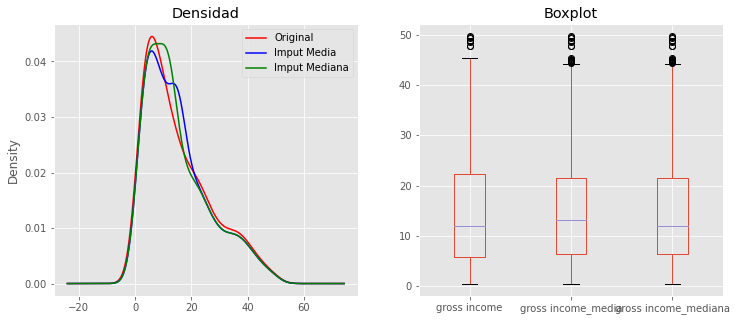

In [18]:
# Gross income

# Media
media = dataNA['gross income'].mean()

# Mediana
mediana = dataNA['gross income'].median()

# Nuevas columnas

dataNA['gross income_media'] = dataNA['gross income'].fillna(media)
dataNA['gross income_mediana'] = dataNA['gross income'].fillna(mediana)
dataNA

# Calculo varianza
vOrg = dataNA['gross income'].var()
vMed = dataNA['gross income_media'].var()
vMediana = dataNA['gross income_mediana'].var()

print('Varianza Original: ', vOrg)
print('Varianza Media: ', vMed)
print('Varianza Mediana: ', vMediana)

#Valores a dataframe
listaVOrig.append(str(vOrg))
listaMedia.append(str(vMed))
listaMediana.append(str(vMediana))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['gross income'].plot.density(color='red', label="Original", ax=ax1)
dataNA['gross income_media'].plot.density(color='blue', label="Imput Media", ax=ax1)
dataNA['gross income_mediana'].plot.density(color='green', label="Imput Mediana", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['gross income','gross income_media','gross income_mediana']].boxplot(ax=ax2)

ax1.legend()
plt.show()


Varianza Original:  2.921335184367179
Varianza Media:  2.014814756785769
Varianza Mediana:  2.0149342442442526


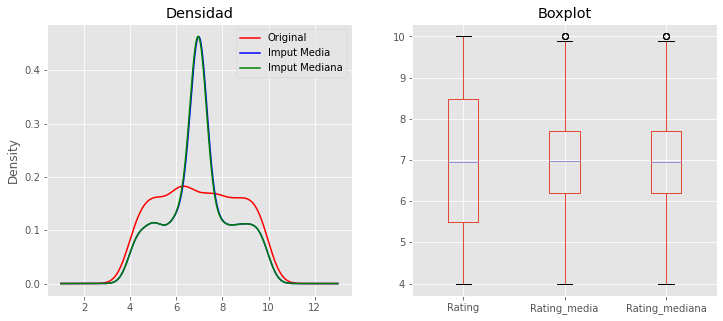

In [19]:
# Rating

# Media
media = dataNA['Rating'].mean()

# Mediana
mediana = dataNA['Rating'].median()

# Nuevas columnas

dataNA['Rating_media'] = dataNA['Rating'].fillna(media)
dataNA['Rating_mediana'] = dataNA['Rating'].fillna(mediana)
dataNA

# Calculo varianza
vOrg = dataNA['Rating'].var()
vMed = dataNA['Rating_media'].var()
vMediana = dataNA['Rating_mediana'].var()

print('Varianza Original: ', vOrg)
print('Varianza Media: ', vMed)
print('Varianza Mediana: ', vMediana)

#Valores a dataframe
listaVOrig.append(str(vOrg))
listaMedia.append(str(vMed))
listaMediana.append(str(vMediana))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Rating'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Rating_media'].plot.density(color='blue', label="Imput Media", ax=ax1)
dataNA['Rating_mediana'].plot.density(color='green', label="Imput Mediana", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Rating','Rating_media','Rating_mediana']].boxplot(ax=ax2)

ax1.legend()
plt.show()


###### Imputación Arbitraria (Min/Max)

Varianza Original:  8.369996843542625
Varianza Min:  10.096575575575667
Varianza Max:  9.998773773773824


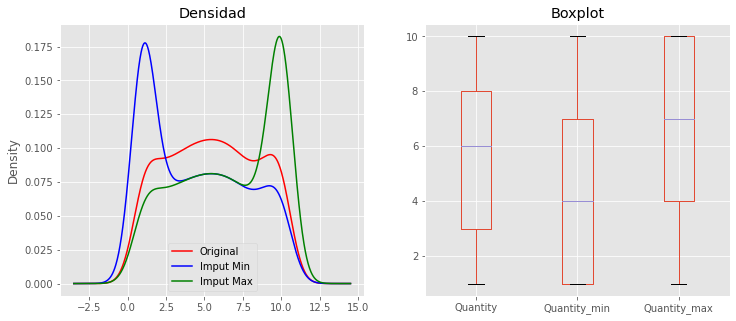

In [20]:
# Quantity

# Minimo

mini = dataNA['Quantity'].min()
mini

# Maximo

maxi = dataNA['Quantity'].max()
maxi

# Nuevas columnas

dataNA['Quantity_min'] = dataNA['Quantity'].fillna(mini)
dataNA['Quantity_max'] = dataNA['Quantity'].fillna(maxi)
dataNA

# Calculo varianza
vOrg = dataNA['Quantity'].var()
vMin = dataNA['Quantity_min'].var()
vMax=  dataNA['Quantity_max'].var()
print('Varianza Original: ', vOrg )
print('Varianza Min: ', vMin )
print('Varianza Max: ', vMax)

#Valores a Dataframe
listaMin.append(str(vMin))
listaMax.append(str(vMax))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Quantity'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Quantity_min'].plot.density(color='blue', label="Imput Min", ax=ax1)
dataNA['Quantity_max'].plot.density(color='green', label="Imput Max", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Quantity','Quantity_min','Quantity_max']].boxplot(ax=ax2)

ax1.legend()
plt.show()


Varianza Original:  60430.982568832536
Varianza Min:  61127.64634422092
Varianza Max:  69398.9148373347


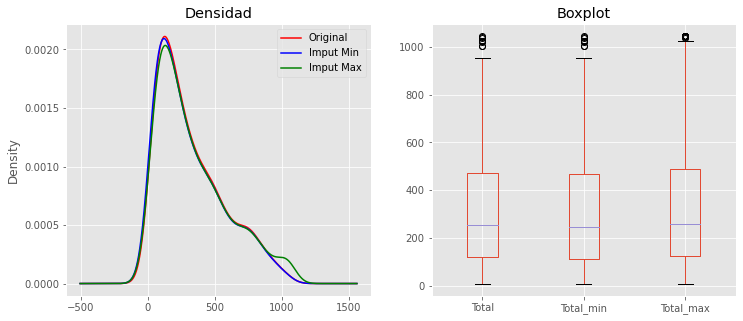

In [21]:
# Total

# Minimo

mini = dataNA['Total'].min()
mini

# Maximo

maxi = dataNA['Total'].max()
maxi

# Nuevas columnas

dataNA['Total_min'] = dataNA['Total'].fillna(mini)
dataNA['Total_max'] = dataNA['Total'].fillna(maxi)
dataNA

# Calculo varianza
vOrg = dataNA['Total'].var()
vMin = dataNA['Total_min'].var()
vMax=  dataNA['Total_max'].var()
print('Varianza Original: ', vOrg )
print('Varianza Min: ', vMin )
print('Varianza Max: ', vMax)

#Valores a Dataframe
listaMin.append(str(vMin))
listaMax.append(str(vMax))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Total'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Total_min'].plot.density(color='blue', label="Imput Min", ax=ax1)
dataNA['Total_max'].plot.density(color='green', label="Imput Max", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Total','Total_min','Total_max']].boxplot(ax=ax2)

ax1.legend()
plt.show()


Varianza Original:  137.3345425935246
Varianza Min:  142.0047723463373
Varianza Max:  206.50433872449986


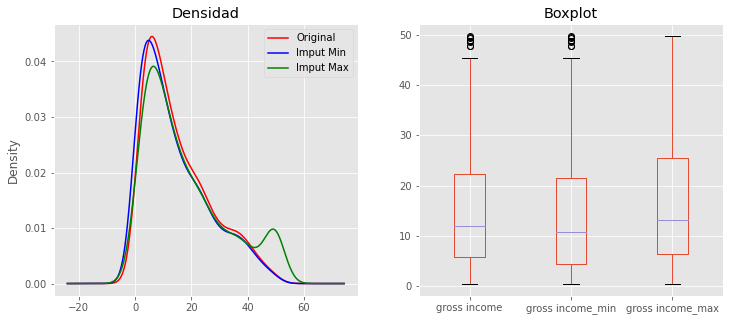

In [22]:
# Gross income

# Minimo

mini = dataNA['gross income'].min()
mini

# Maximo

maxi = dataNA['gross income'].max()
maxi

# Nuevas columnas

dataNA['gross income_min'] = dataNA['gross income'].fillna(mini)
dataNA['gross income_max'] = dataNA['gross income'].fillna(maxi)
dataNA

# Calculo varianza
vOrg = dataNA['gross income'].var()
vMin = dataNA['gross income_min'].var()
vMax=  dataNA['gross income_max'].var()
print('Varianza Original: ', vOrg )
print('Varianza Min: ', vMin )
print('Varianza Max: ', vMax)

#Valores a Dataframe
listaMin.append(str(vMin))
listaMax.append(str(vMax))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['gross income'].plot.density(color='red', label="Original", ax=ax1)
dataNA['gross income_min'].plot.density(color='blue', label="Imput Min", ax=ax1)
dataNA['gross income_max'].plot.density(color='green', label="Imput Max", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['gross income','gross income_min','gross income_max']].boxplot(ax=ax2)

ax1.legend()
plt.show()


Varianza Original:  2.921335184367179
Varianza Min:  3.9081048648648595
Varianza Max:  3.975876636636622


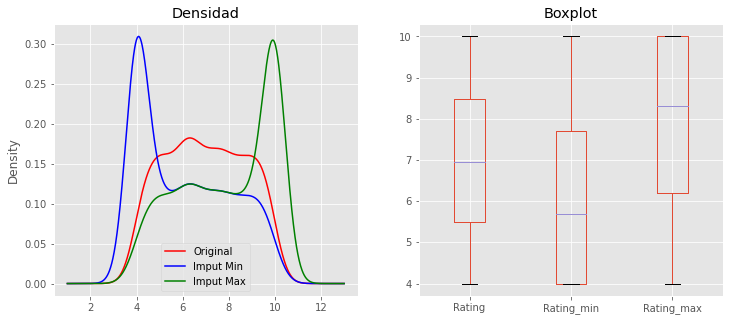

In [23]:
# Rating

# Minimo

mini = dataNA['Rating'].min()
mini

# Maximo

maxi = dataNA['Rating'].max()
maxi

# Nuevas columnas

dataNA['Rating_min'] = dataNA['Rating'].fillna(mini)
dataNA['Rating_max'] = dataNA['Rating'].fillna(maxi)
dataNA

# Calculo varianza
vOrg = dataNA['Rating'].var()
vMin = dataNA['Rating_min'].var()
vMax=  dataNA['Rating_max'].var()
print('Varianza Original: ', vOrg )
print('Varianza Min: ', vMin )
print('Varianza Max: ', vMax)

#Valores a Dataframe
listaMin.append(str(vMin))
listaMax.append(str(vMax))


# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Rating'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Rating_min'].plot.density(color='blue', label="Imput Min", ax=ax1)
dataNA['Rating_max'].plot.density(color='green', label="Imput Max", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Rating','Rating_min','Rating_max']].boxplot(ax=ax2)

ax1.legend()
plt.show()


###### Números aleatorios en base a la distribución

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


,sumsquare_error,aic,bic,kl_div
johnsonsb,10.513792,726.977239,-3247.857978,inf
arcsine,10.694438,506.257309,-3248.119643,inf
rdist,10.744697,inf,-3237.899102,inf
gausshyper,10.930514,487.632008,-3204.883810,inf
gengamma,10.966757,493.318670,-3215.631926,inf


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


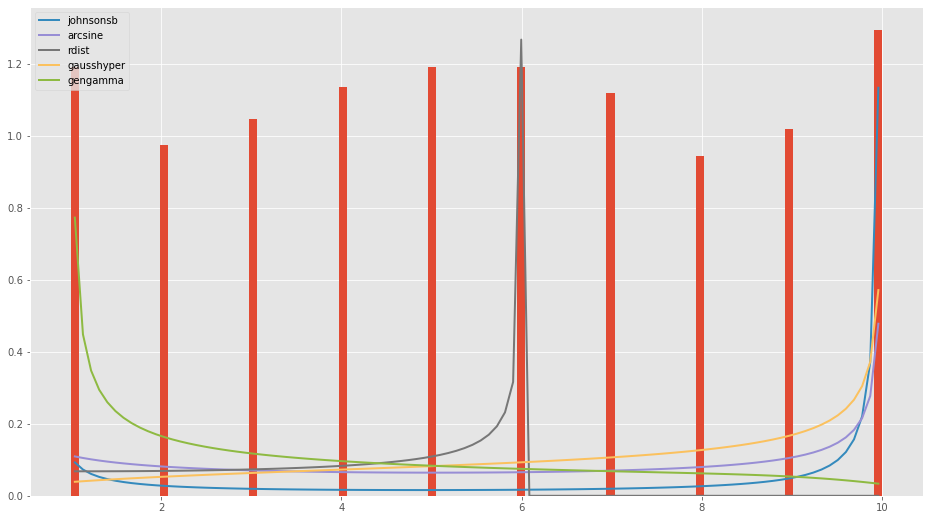

In [24]:
# Convirtiendo a arreglo: Quantity
y = dataNA['Quantity'].to_numpy()
#y
datx = dataNA['Quantity'].dropna()
#datx
cant = dataNA['Quantity'].isnull().sum()
#cant
x = datx.to_numpy()
#x

f = Fitter(x)
f.fit()
f.summary()


In [25]:
media = dataNA['Quantity'].mean()
desest = dataNA['Quantity'].std()
# Distribucion seleccionada:
distri = ss.norm(loc= media, scale=desest)
x_rvs = distri.rvs(cant)
x_rvs


array([ 9.01478563,  6.40967403,  3.13446272,  5.87279401,  6.47761383,
        6.5224176 ,  9.8404718 ,  9.0209773 ,  4.50051897,  7.49441545,
        3.79043599,  5.61935399,  4.22673512,  6.08145638,  2.49302177,
        1.04439248,  3.82939745,  3.43118274,  7.3690881 ,  8.22153825,
        7.31044768,  3.50838022,  8.4653597 ,  7.69818758,  6.59056035,
        6.53186804,  5.79023017,  0.62992085,  9.92114048,  9.40340296,
        9.94037672,  7.77176201,  5.67301192,  2.5944761 ,  8.69380591,
        2.69653134,  4.00074959,  4.4619272 ,  4.44516706,  7.86296257,
        1.47611519,  4.69896117,  2.05862205,  4.2643654 ,  6.00644132,
        6.18136796,  2.46003542,  6.9237715 ,  7.52070354,  6.4564972 ,
        4.90920261,  3.18104227,  7.61913201,  2.954922  , 15.19983886,
        8.35506044,  5.54862527,  7.89181487,  8.00006913,  3.15188371,
        7.40219777,  4.86092751,  9.87900592,  7.72352044,  6.03963129,
        4.04968513,  7.44082293,  9.9853281 , 14.39157153, 11.50

[ 7.          5.          7.          7.          7.          6.
 10.          2.          3.          4.          4.         10.
 10.          6.          7.          6.          3.          5.
  3.          2.          5.          3.          8.          1.
  2.          5.          9.          5.          8.          2.
  4.          1.          5.          9.          8.          8.
  1.          6.          8.          2.          4.          9.
  9.          6.         10.          7.          5.          4.
  1.          2.          8.          2.          8.         10.
  6.          3.          9.         10.          4.         10.
  2.          6.         10.          1.         10.          3.
  6.         10.          9.          9.          5.          6.
  3.          8.          5.          7.          5.          7.
  6.          4.         10.          7.          9.          1.
  1.         10.          6.          3.          6.          1.
  9.          9.         

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The int

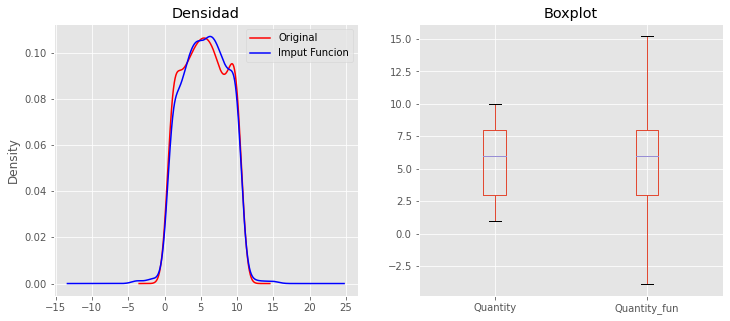

In [26]:
z = np.concatenate((x, x_rvs), axis=0)
print(z)

dataNA['Quantity_fun'] = z
dataNA

# Calculo varianza
vOrg = dataNA['Quantity'].var()
vFun = dataNA['Quantity_fun'].var()
print('Varianza Original: ', vOrg)
print('Varianza Fun: ', vFun)

listaFun.append(str(vFun))

# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Quantity'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Quantity_fun'].plot.density(color='blue', label="Imput Funcion", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Quantity','Quantity_fun']].boxplot(ax=ax2)

ax1.legend()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum numbe

,sumsquare_error,aic,bic,kl_div
chi2,0.000012,1483.299983,-17817.378266,inf
gamma,0.000012,1483.300015,-17817.378036,inf
geninvgauss,0.000012,1485.300031,-17810.490472,inf
erlang,0.000012,1483.300021,-17817.377965,inf
exponnorm,0.000013,1487.692984,-17761.640818,inf


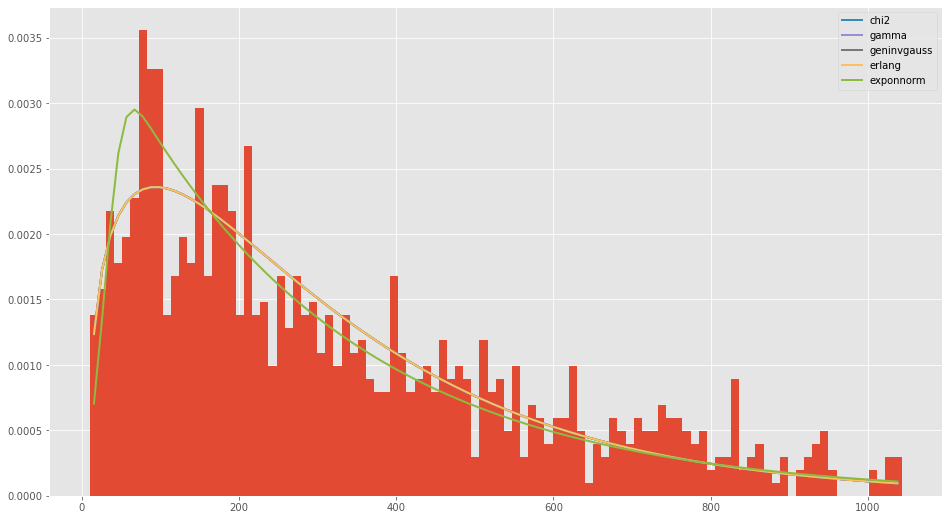

In [27]:
# Convirtiendo a arreglo: Total
y = dataNA['Total'].to_numpy()
#y
datx = dataNA['Total'].dropna()
#datx
cant = dataNA['Total'].isnull().sum()
#cant
x = datx.to_numpy()
#x

f = Fitter(x)
f.fit()
f.summary()


In [28]:
media = dataNA['Total'].mean()
desest = dataNA['Total'].std()
# Distribucion seleccionada:
x_rvs = expon.rvs(loc= media, scale=desest, size=cant)
x_rvs

array([ 998.13621707,  376.22402541,  403.16701193,  671.35994414,
        490.57106994,  396.57877505,  328.4964074 ,  656.02175475,
        484.79484305,  582.0459716 ,  755.6436236 , 1047.71300524,
        431.40160778,  987.40632671, 1453.81299698,  601.54597201,
        706.6584418 ,  353.72086705,  557.01525108,  527.03044846])

[ 548.9715       80.22        340.5255      489.048       627.6165
  433.692       772.38         76.146       172.746        60.816
  107.142       246.4875      453.495       749.49        590.436
  506.6355      457.443       172.2105       84.63        451.71
   69.72        181.44        279.1845      441.756        35.196
  184.107       463.89        235.2105      494.1825      737.7615
  703.752       202.818       417.564        71.526       328.755
  575.316       461.328       253.008        91.056       117.831
  435.456       829.08         32.277       394.632       535.7205
  189.0945      119.259       867.615       671.79        234.0975
   75.054        16.2015       33.936       722.232       752.64
  759.675       192.843        77.931       351.099       520.4115
  166.005       318.108       166.635        70.287       614.943
  827.085        19.2465      939.54        652.26        152.838
  478.233       705.6315      437.325       463.428       189.0945
  822.

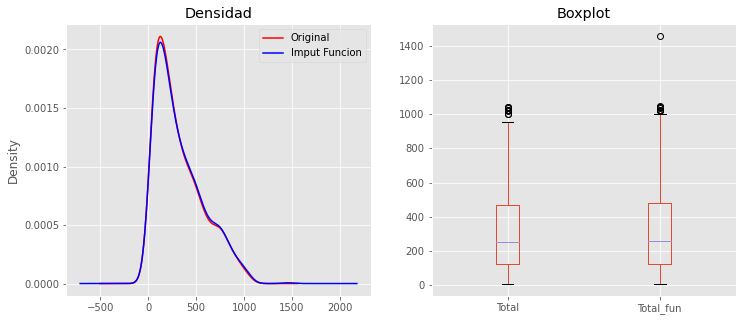

In [29]:
z = np.concatenate((x, x_rvs), axis=0)
print(z)

dataNA['Total_fun'] = z
dataNA

# Calculo varianza
vOrg = dataNA['Total'].var()
vFun = dataNA['Total_fun'].var()
print('Varianza Original: ', vOrg)
print('Varianza Fun: ', vFun)

listaFun.append(str(vFun))

# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Total'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Total_fun'].plot.density(color='blue', label="Imput Funcion", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Total','Total_fun']].boxplot(ax=ax2)

ax1.legend()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_i

,sumsquare_error,aic,bic,kl_div
johnsonsb,0.005001,851.573969,-11230.410076,inf
gamma,0.005356,875.331811,-11173.618959,inf
erlang,0.005356,875.332912,-11173.614982,inf
geninvgauss,0.005356,877.332194,-11166.780709,inf
gilbrat,0.006096,889.463669,-11060.304606,inf


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


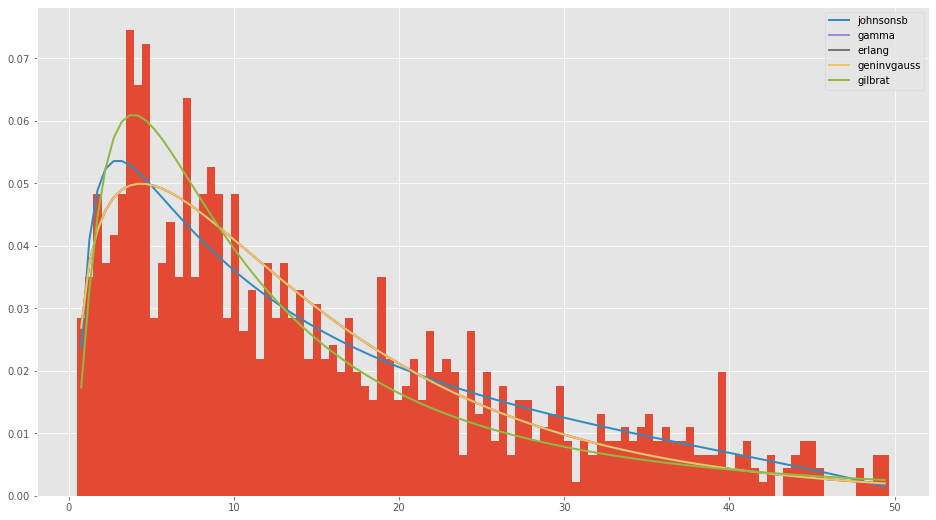

In [30]:
# Convirtiendo a arreglo: Gross income
y = dataNA['gross income'].to_numpy()
#y
datx = dataNA['gross income'].dropna()
#datx
cant = dataNA['gross income'].isnull().sum()
#cant
x = datx.to_numpy()
#x

f = Fitter(x)
f.fit()
f.summary()

In [31]:
media = dataNA['gross income'].mean()
desest = dataNA['gross income'].std()
# Distribucion seleccionada:
x_rvs = expon.rvs(loc= media, scale=desest, size=cant)
x_rvs

array([34.96509094, 20.17285049, 26.96560834, 21.65475325, 36.15042381,
       18.61792351, 45.43445429, 30.22215408, 28.25931608, 83.67681446,
       15.49860424, 23.61413783, 16.9037387 , 30.01518537, 69.57737359,
       23.21034604, 29.22434566, 21.25090136, 23.10347819, 40.58872897,
       17.58632609, 25.24687732, 27.31180415, 18.46086375, 19.94254192,
       17.97520631, 68.76724859, 26.45232399, 20.75978513, 23.81899323,
       44.96667578, 16.82865463, 19.74656726, 22.42646969, 41.36805173,
       32.8402503 , 16.74384231, 22.83464544, 18.64547275, 24.40973919,
       34.75280206, 36.01622626, 18.55903994, 24.01248256, 24.04972673,
       16.59789311, 54.26977857, 50.78542008, 15.73618128, 24.91592016,
       23.07605953, 32.14456342, 25.72328589, 21.51905359, 40.66686363,
       34.8285848 , 15.68394039, 24.65981999, 19.09894131, 18.87247847,
       22.42343726, 19.82814322, 28.511211  , 19.02891494, 66.76178038,
       22.25849395, 17.98399858, 28.55021472, 20.72488311, 19.59

[26.1415      3.82       16.2155     23.288       3.626       8.226
  2.896       5.102      11.7375     21.595      35.69       28.116
 24.1255     21.783       8.2005      3.32        8.64       13.2945
 21.036       1.676       8.767      22.09       11.2005     23.5325
 35.1315     15.655      27.396      21.968      12.048       4.336
  5.611      20.736      39.48        1.537      18.792      25.5105
  9.0045      5.679      41.315      31.99       11.1475      3.574
  0.7715      1.616      24.7815      7.905      15.148       7.935
  3.347      29.283      39.385       0.9165     44.74       31.06
  7.278      22.773      33.6015     20.825      22.068       9.0045
 39.155      12.2275     29.071      19.13       17.283       2.1235
 23.097       9.476      22.43        7.693      28.962       4.4875
  4.858      43.935       3.735       8.214      18.639      15.291
 40.985       1.649      14.7315     25.494      26.1315     36.3555
  4.053       5.485       2.568       5.48

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


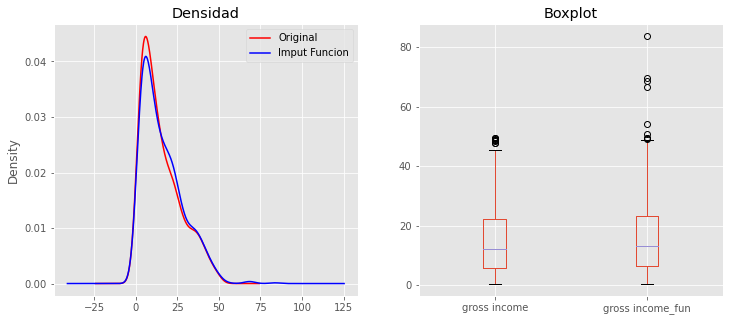

In [32]:
z = np.concatenate((x, x_rvs), axis=0)
print(z)

dataNA['gross income_fun'] = z
dataNA

# Calculo varianza
vOrg = dataNA['gross income'].var()
vFun = dataNA['gross income_fun'].var()
print('Varianza Original: ', vOrg)
print('Varianza Fun: ', vFun)

listaFun.append(str(vFun))

# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['gross income'].plot.density(color='red', label="Original", ax=ax1)
dataNA['gross income_fun'].plot.density(color='blue', label="Imput Funcion", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['gross income','gross income_fun']].boxplot(ax=ax2)

ax1.legend()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be d

,sumsquare_error,aic,bic,kl_div
gennorm,2.230254,365.256749,-3937.247480,inf
uniform,2.237508,362.351894,-3941.543382,inf
powerlaw,2.238975,364.426232,-3934.554557,inf
semicircular,2.350191,371.404692,-3907.641183,inf
bradford,2.357137,368.704236,-3899.068122,inf


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


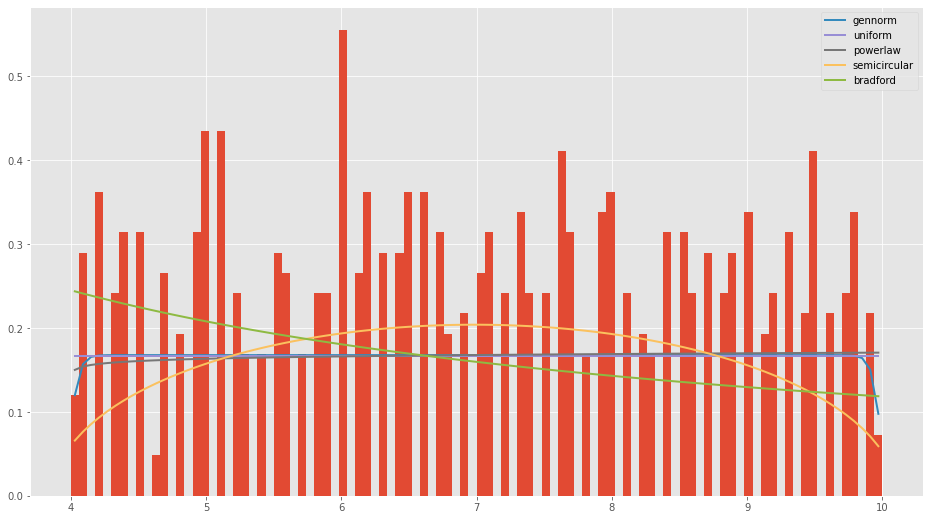

In [33]:
# Convirtiendo a arreglo: Rating
y = dataNA['Rating'].to_numpy()
#y
datx = dataNA['Rating'].dropna()
#datx
cant = dataNA['Rating'].isnull().sum()
#cant
x = datx.to_numpy()
#x

f = Fitter(x)
f.fit()
f.summary()


In [34]:
media = dataNA['Rating'].mean()
desest = dataNA['Rating'].std()
# Distribucion seleccionada:
distri = ss.norm(loc= media, scale=desest)
x_rvs = distri.rvs(cant)
x_rvs

array([ 9.48610129,  8.13937781,  5.50265808,  9.24585353,  8.3270627 ,
        7.99695937,  9.85246248,  7.60210702,  7.14245594,  5.9748283 ,
        7.87529139,  8.46054694,  7.07444543,  6.1883907 ,  7.6252585 ,
        7.5143254 ,  6.60059136,  7.5825302 ,  9.46947062,  5.54546034,
        5.82184499,  8.17637469,  8.37801061,  7.44498995,  5.28431006,
        5.77764997,  8.71770903, 10.24217563,  9.07345647,  8.1813707 ,
        8.2718795 ,  5.24672131,  6.19717673,  5.43113848,  7.45885442,
        4.07955664,  4.72204897,  6.29863002,  6.27487387,  6.48370357,
        8.34235488,  6.01805681,  6.88190933,  6.1732546 ,  6.63773389,
        9.82562411,  8.9009232 ,  5.04407893,  5.7919804 ,  6.44602582,
        6.64333498,  3.97339075,  8.65395153,  6.22215574,  6.12152935,
        6.54374996,  4.20267863,  9.44247402,  9.30953653,  3.54920367,
        8.07481815,  7.05945949,  6.93476925,  9.13731003,  9.04103565,
        8.05796523,  6.66752503,  9.13759794,  7.76560651,  5.17

[ 9.1         7.4         8.4         5.9         4.5         6.8
  7.1         5.1         4.4         9.9         6.          8.5
  4.5         5.1         5.1         7.5         6.8         7.
  4.7         7.6         7.7         6.3         5.6         7.6
  7.2         8.4         4.1         8.1         7.9         9.5
  8.5         6.5         6.5         8.2         5.8         7.
 10.          8.6         7.6         5.8         9.4         5.4
  8.6         6.6         6.          5.5         6.4         6.6
  8.3         6.6         4.          9.9         7.3         6.1
  7.1         8.2         5.1         4.1         9.3         7.4
  4.1         7.2         4.9         9.9         8.          7.3
  7.9         7.4         4.2         9.2         4.6         8.4
  4.3         6.          4.1         5.2         6.5         4.2
  4.6         7.3         4.5         9.          5.9         8.5
  7.2         7.5         5.3         6.2         8.8         9.8
  8.2       

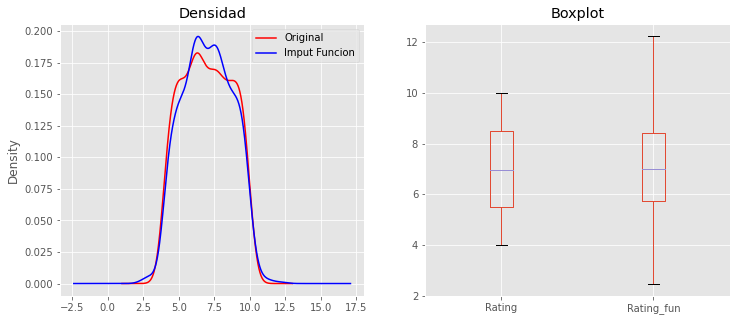

In [35]:
z = np.concatenate((x, x_rvs), axis=0)
print(z)

dataNA['Rating_fun'] = z
dataNA

# Calculo varianza
vOrg = dataNA['Rating'].var()
vFun = dataNA['Rating_fun'].var()
print('Varianza Original: ', vOrg)
print('Varianza Fun: ', vFun)

listaFun.append(str(vFun))

# Gráficas
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Densidad")
dataNA['Rating'].plot.density(color='red', label="Original", ax=ax1)
dataNA['Rating_fun'].plot.density(color='blue', label="Imput Funcion", ax=ax1)
#ax.legend()
#plt.show()

ax2.set_title("Boxplot")
dataNA[['Rating','Rating_fun']].boxplot(ax=ax2)

ax1.legend()
plt.show()

#### Análisis Imputaciones Numéricas

In [36]:
Org = np.array(listaVOrig)
Media = np.array(listaMedia)
Mediana = np.array(listaMediana)
Min = np.array(listaMin)
Max = np.array(listaMax)
Fun = np.array(listaFun)

dfdata = pd.DataFrame(listaCol)
dfdata['Orginal'] = Org
dfdata['Media'] = Media
dfdata['Mediana'] = Mediana
dfdata['Min'] = Min
dfdata['Max'] = Max
dfdata['fun'] = Fun
dfdata

,0,Orginal,Media,Mediana,Min,Max,fun
0,Quantity,8.369996843542625,6.392700291914965,6.432551551551548,10.096575575575667,9.998773773773824,8.695440644330391
1,Total,60430.982568832536,59221.15308797504,59314.61086749256,61127.64634422092,69398.9148373347,62782.3882671195
2,gross income,137.3345425935246,127.43655754173905,128.13223199671594,142.0047723463373,206.50433872449986,152.10814075622952
3,Rating,2.921335184367179,2.014814756785769,2.0149342442442526,3.9081048648648595,3.975876636636622,2.8989619411515433


Selección de Imputaciones

1. Quantity = Fun
2. Total = Media
3. Gross Income = Media
4. Rating = Fun

#### Variables Categóricas

In [37]:
dataNA = dataNA[['Branch', 'Customer type', 'Gender', 'Unit price', 'Quantity_fun', 'Total_media', 'Payment', 'gross income_media', 'Rating_fun']]
dataNA.head()

,Branch,Customer type,Gender,Unit price,Quantity_fun,Total_media,Payment,gross income_media,Rating_fun
0,A,Member,Female,74.69,7.0,548.971500,Ewallet,26.141500,9.1
1,C,Normal,Female,15.28,5.0,80.220000,NaN,3.820000,7.4
2,A,Normal,Male,46.33,7.0,340.525500,Credit card,16.215500,8.4
3,A,NaN,Male,58.22,7.0,489.048000,Ewallet,23.288000,5.9
4,A,NaN,NaN,86.31,7.0,322.404011,NaN,15.267117,4.5


In [38]:
#cantidad de NaN
dataNA.isnull().sum()

Branch                127
Customer type         126
Gender                 72
Unit price              0
Quantity_fun            0
Total_media             0
Payment               310
gross income_media      0
Rating_fun              0
dtype: int64

In [39]:
#% de NaN
dataNA.isnull().mean()

Branch                0.127
Customer type         0.126
Gender                0.072
Unit price            0.000
Quantity_fun          0.000
Total_media           0.000
Payment               0.310
gross income_media    0.000
Rating_fun            0.000
dtype: float64

##### Branch

In [40]:
dataNA['Branch'].value_counts()

C    295
B    291
A    287
Name: Branch, dtype: int64

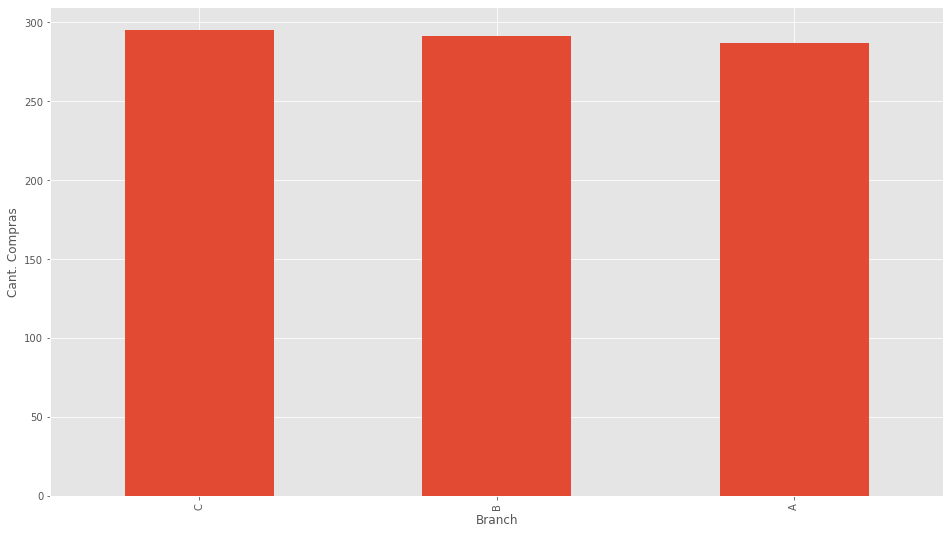

In [41]:
dataNA['Branch'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cant. Compras")
plt.xlabel("Branch")
plt.show()

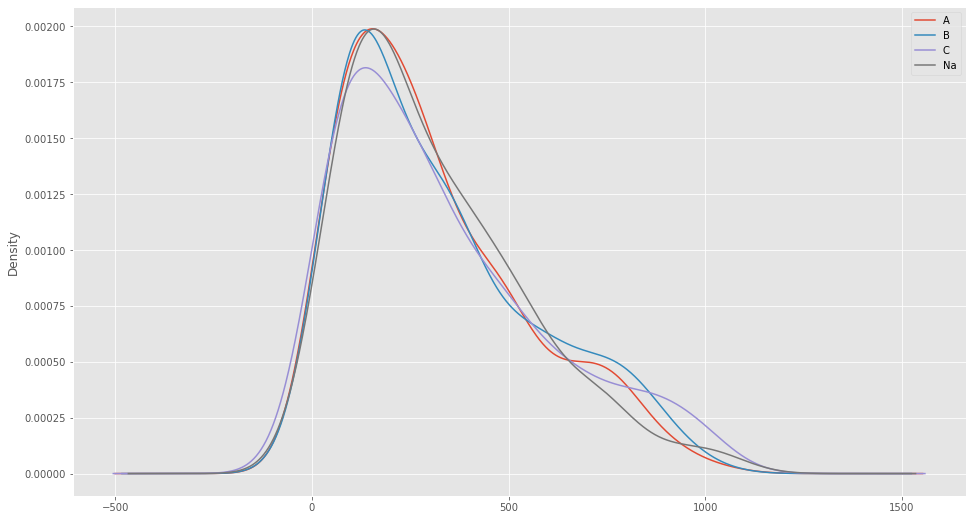

In [42]:
#Verificando impacto de la data faltante sobre la variable Branch
fig = plt.figure()
ax = fig.add_subplot(111)

dataNA[dataNA['Branch'] == 'A']['Total_media'].plot(kind='kde', ax=ax, label="A")
dataNA[dataNA['Branch'] == 'B']['Total_media'].plot(kind='kde', ax=ax, label="B")
dataNA[dataNA['Branch'] == 'C']['Total_media'].plot(kind='kde', ax=ax, label="C")
dataNA[dataNA['Branch'].isnull()]['Total_media'].plot(kind='kde', ax=ax, label="Na")

ax.legend()

plt.show()

In [43]:
dataNA['Branch'].fillna('A', inplace=True)

##### Customer type

In [44]:
dataNA['Customer type'].value_counts()

Normal    444
Member    430
Name: Customer type, dtype: int64

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


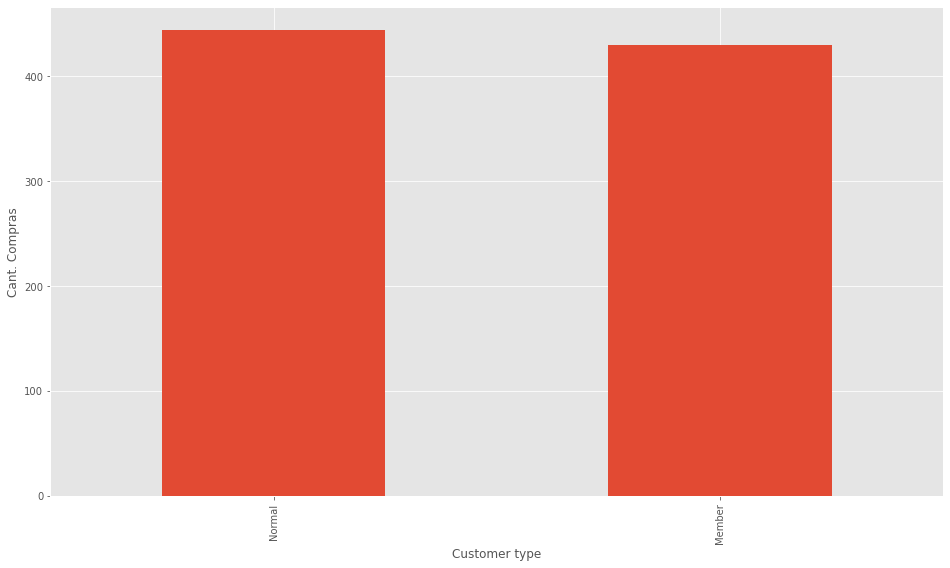

In [45]:
dataNA['Customer type'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cant. Compras")
plt.xlabel("Customer type")
plt.show()

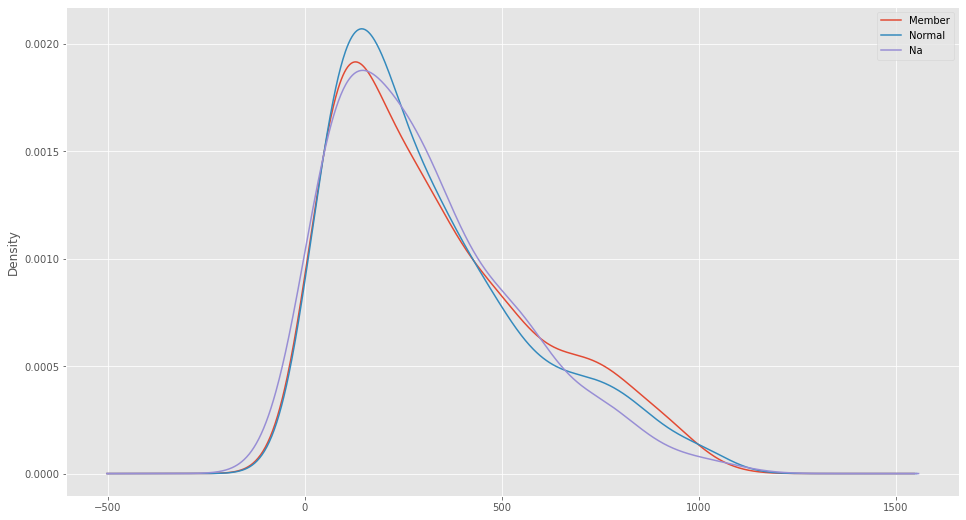

In [46]:
#Verificando impacto de la data faltante sobre la variable Customer type
fig = plt.figure()
ax = fig.add_subplot(111)

dataNA[dataNA['Customer type'] == 'Member']['Total_media'].plot(kind='kde', ax=ax, label="Member")
dataNA[dataNA['Customer type'] == 'Normal']['Total_media'].plot(kind='kde', ax=ax, label="Normal")
dataNA[dataNA['Customer type'].isnull()]['Total_media'].plot(kind='kde', ax=ax, label="Na")

ax.legend()
plt.show()

In [47]:
dataNA['Customer type'].fillna('Member', inplace=True)

##### Gender

In [48]:
dataNA['Gender'].value_counts()

Female    467
Male      461
Name: Gender, dtype: int64

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


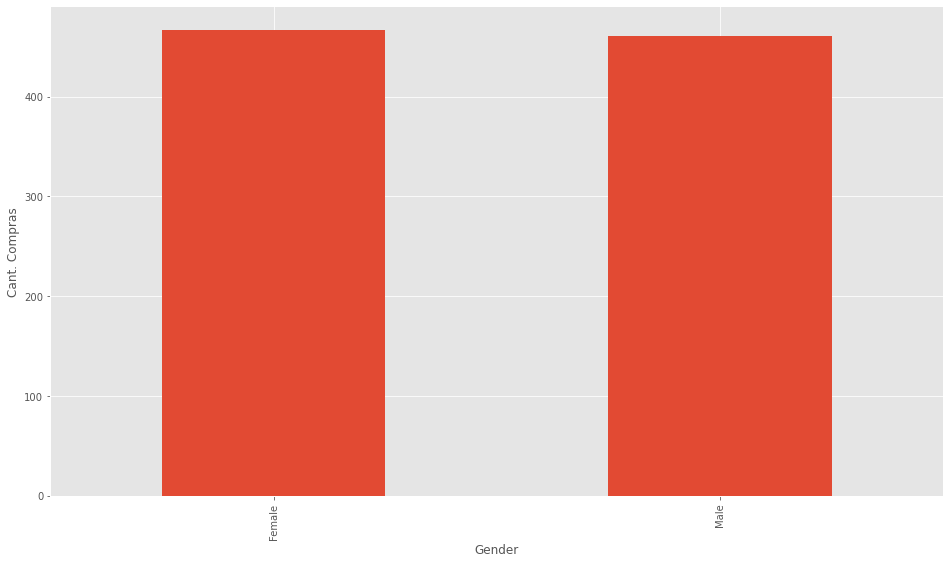

In [49]:
dataNA['Gender'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cant. Compras")
plt.xlabel("Gender")
plt.show()

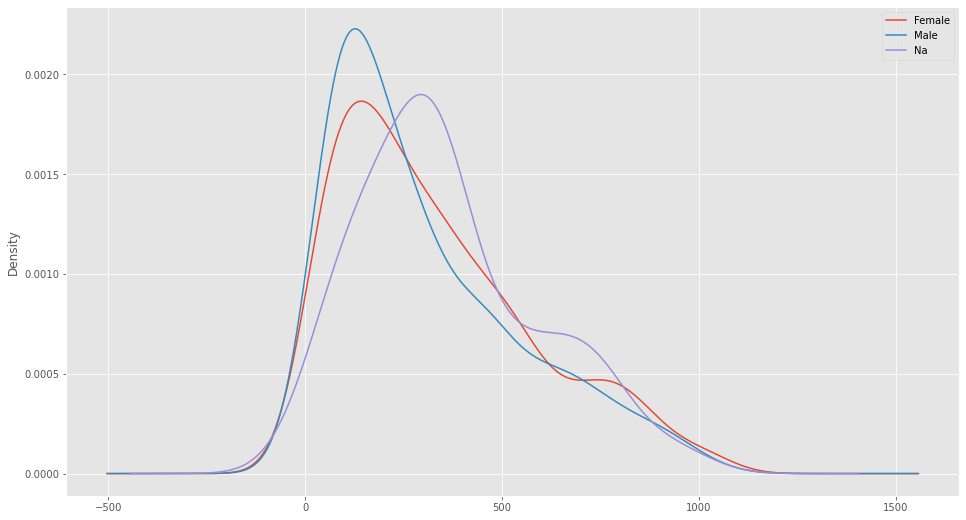

In [50]:
#Verificando impacto de la data faltante sobre la variable Gender
fig = plt.figure()
ax = fig.add_subplot(111)

dataNA[dataNA['Gender'] == 'Female']['Total_media'].plot(kind='kde', ax=ax, label="Female")
dataNA[dataNA['Gender'] == 'Male']['Total_media'].plot(kind='kde', ax=ax, label="Male")
dataNA[dataNA['Gender'].isnull()]['Total_media'].plot(kind='kde', ax=ax, label="Na")

ax.legend()
plt.show()


In [51]:
dataNA['Gender'].fillna('Female', inplace=True)

##### Payment

In [52]:
dataNA['Payment'].value_counts()

Cash           235
Ewallet        235
Credit card    220
Name: Payment, dtype: int64

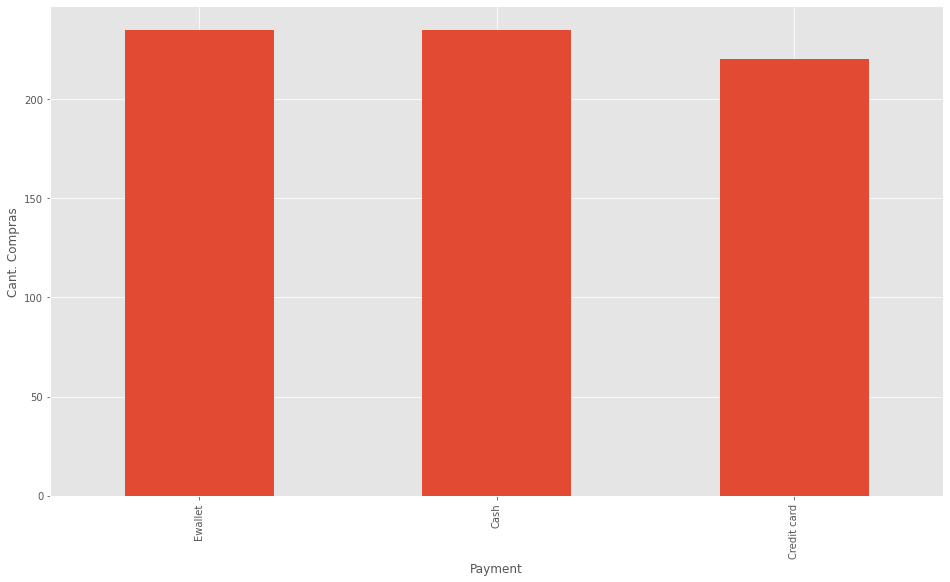

In [53]:
dataNA['Payment'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cant. Compras")
plt.xlabel("Payment")
plt.show()

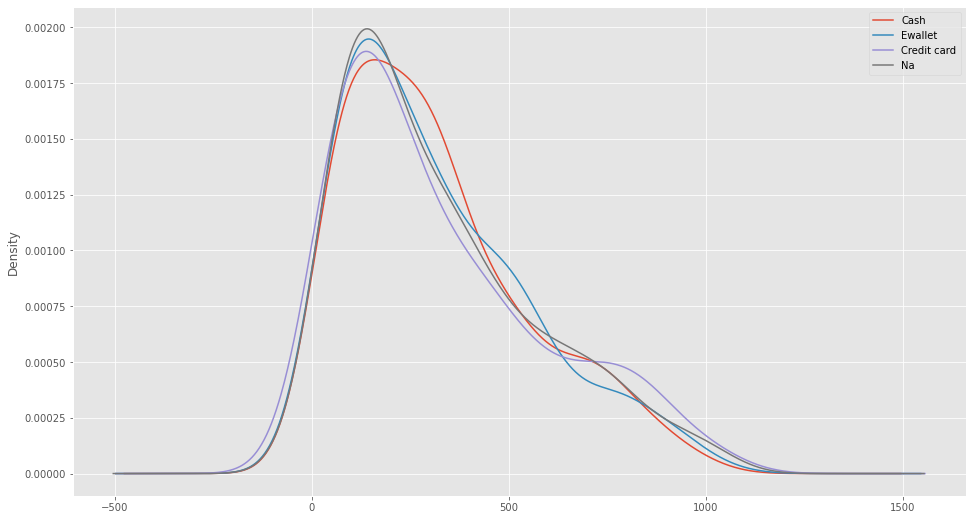

In [54]:
#Verificando impacto de la data faltante sobre la variable Payment
fig = plt.figure()
ax = fig.add_subplot(111)

dataNA[dataNA['Payment'] == 'Cash']['Total_media'].plot(kind='kde', ax=ax, label="Cash")
dataNA[dataNA['Payment'] == 'Ewallet']['Total_media'].plot(kind='kde', ax=ax, label="Ewallet")
dataNA[dataNA['Payment'] == 'Credit card']['Total_media'].plot(kind='kde', ax=ax, label="Credit card")
dataNA[dataNA['Payment'].isnull()]['Total_media'].plot(kind='kde', ax=ax, label="Na")

ax.legend()
plt.show()


In [55]:
dataNA['Payment'].fillna('Cash', inplace=True)

In [56]:
dataNA.isnull().sum()

Branch                0
Customer type         0
Gender                0
Unit price            0
Quantity_fun          0
Total_media           0
Payment               0
gross income_media    0
Rating_fun            0
dtype: int64

In [57]:
dataNA

,Branch,Customer type,Gender,Unit price,Quantity_fun,Total_media,Payment,gross income_media,Rating_fun
0,A,Member,Female,74.69,7.000000,548.971500,Ewallet,26.141500,9.100000
1,C,Normal,Female,15.28,5.000000,80.220000,Cash,3.820000,7.400000
2,A,Normal,Male,46.33,7.000000,340.525500,Credit card,16.215500,8.400000
3,A,Member,Male,58.22,7.000000,489.048000,Ewallet,23.288000,5.900000
4,A,Member,Female,86.31,7.000000,322.404011,Cash,15.267117,4.500000
...,...,...,...,...,...,...,...,...,...
995,A,Normal,Male,40.35,4.740374,42.367500,Ewallet,2.017500,4.695693
996,A,Normal,Female,97.38,2.925883,1022.490000,Cash,48.690000,8.814924
997,A,Member,Female,31.84,-0.419561,322.404011,Cash,15.267117,7.353337
998,A,Normal,Male,65.82,2.827140,69.111000,Cash,3.291000,5.230946


In [58]:
dataNA.describe()

,Unit price,Quantity_fun,Total_media,gross income_media,Rating_fun
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.599585,322.404011,15.267117,7.019440
std,26.494628,2.948803,243.353967,11.288780,1.702634
min,10.080000,-3.849328,10.678500,0.508500,2.480194
25%,32.875000,3.000000,125.713875,6.285750,5.725996
50%,55.230000,6.000000,260.484000,13.113000,7.000000
75%,77.935000,8.000000,466.436250,21.481500,8.400000
max,99.960000,15.199839,1042.650000,49.650000,12.221008


## Codificación de variables categóricas

### One hot encoding

In [59]:
dataNA['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [60]:
dataNA['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [61]:
dataNA['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [62]:
dataNA['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [63]:
dataHE = pd.concat([dataNA['Unit price'], 
                        dataNA['Quantity_fun'],
                        dataNA['Total_media'],
                        dataNA['gross income_media'],
                        dataNA['Rating_fun'],
                        pd.get_dummies(dataNA['Branch']), 
                        pd.get_dummies(dataNA['Customer type']), 
                        pd.get_dummies(dataNA['Gender']),
                        pd.get_dummies(dataNA['Payment'])], axis=1)
dataHE.head()

,Unit price,Quantity_fun,Total_media,gross income_media,Rating_fun,A,B,C,Member,Normal,Female,Male,Cash,Credit card,Ewallet
0,74.69,7.0,548.971500,26.141500,9.1,1,0,0,1,0,1,0,0,0,1
1,15.28,5.0,80.220000,3.820000,7.4,0,0,1,0,1,1,0,1,0,0
2,46.33,7.0,340.525500,16.215500,8.4,1,0,0,0,1,0,1,0,1,0
3,58.22,7.0,489.048000,23.288000,5.9,1,0,0,1,0,0,1,0,0,1
4,86.31,7.0,322.404011,15.267117,4.5,1,0,0,1,0,1,0,1,0,0


In [64]:
dataNA.describe()

,Unit price,Quantity_fun,Total_media,gross income_media,Rating_fun
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.599585,322.404011,15.267117,7.019440
std,26.494628,2.948803,243.353967,11.288780,1.702634
min,10.080000,-3.849328,10.678500,0.508500,2.480194
25%,32.875000,3.000000,125.713875,6.285750,5.725996
50%,55.230000,6.000000,260.484000,13.113000,7.000000
75%,77.935000,8.000000,466.436250,21.481500,8.400000
max,99.960000,15.199839,1042.650000,49.650000,12.221008


In [65]:
dataNA

,Branch,Customer type,Gender,Unit price,Quantity_fun,Total_media,Payment,gross income_media,Rating_fun
0,A,Member,Female,74.69,7.000000,548.971500,Ewallet,26.141500,9.100000
1,C,Normal,Female,15.28,5.000000,80.220000,Cash,3.820000,7.400000
2,A,Normal,Male,46.33,7.000000,340.525500,Credit card,16.215500,8.400000
3,A,Member,Male,58.22,7.000000,489.048000,Ewallet,23.288000,5.900000
4,A,Member,Female,86.31,7.000000,322.404011,Cash,15.267117,4.500000
...,...,...,...,...,...,...,...,...,...
995,A,Normal,Male,40.35,4.740374,42.367500,Ewallet,2.017500,4.695693
996,A,Normal,Female,97.38,2.925883,1022.490000,Cash,48.690000,8.814924
997,A,Member,Female,31.84,-0.419561,322.404011,Cash,15.267117,7.353337
998,A,Normal,Male,65.82,2.827140,69.111000,Cash,3.291000,5.230946


## Tratamiento de outliers

In [66]:
from scipy import stats

In [67]:
def detect_outliers(df, variable):
    plt.figure(figsize=(20, 6))
    
    #3 columnas
    plt.subplot(1, 3, 1)
    #Density histogram
    sns.distplot(df[variable], bins=30)
    plt.title("Densidad-Histograma")
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title("QQ-Plot")
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")
    
    plt.show()

In [68]:
#Método del IQR = Interquantial rate
def calculo_extremos(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    return LI, LS

In [69]:
LI_T, LS_T = calculo_extremos(dataNA, 'Total_media', 1.75)
LI_T, LS_T

(-470.55028125, 1062.70040625)

LI_T, LS_T = calculo_extremos(dataNA, 'Total', 1.75)
LI_T, LS_T

In [70]:
LI_GI, LS_GI = calculo_extremos(dataNA, 'gross income_media', 1.75)
LI_GI, LS_GI

(-20.3068125, 48.0740625)

In [71]:
LI_UP, LS_UP = calculo_extremos(dataNA, 'Unit price', 1.75)
LI_UP, LS_UP 

(-45.980000000000004, 156.79000000000002)

In [72]:
LI_R, LS_R = calculo_extremos(dataNA, 'Rating_fun', 1.75)
LI_R, LS_R 

(1.0464877861240431, 13.079507772466519)

### Tratamiento outliers - Variable Total

In [73]:
dataNA['Total_CP'] = np.where(dataNA['Total_media'] > LS_T, LS_T, 
                          np.where(dataNA['Total_media'] < LI_T, LI_T, dataNA['Total_media']))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


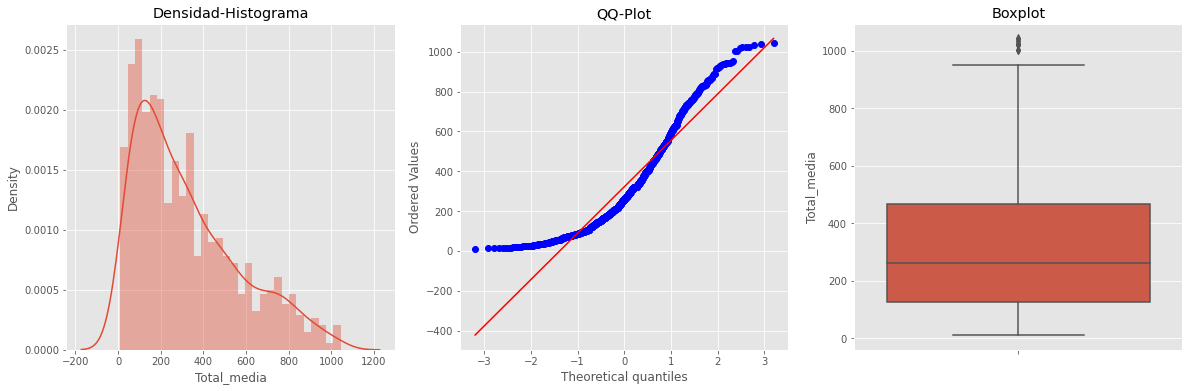

In [74]:
detect_outliers(dataNA, 'Total_media')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


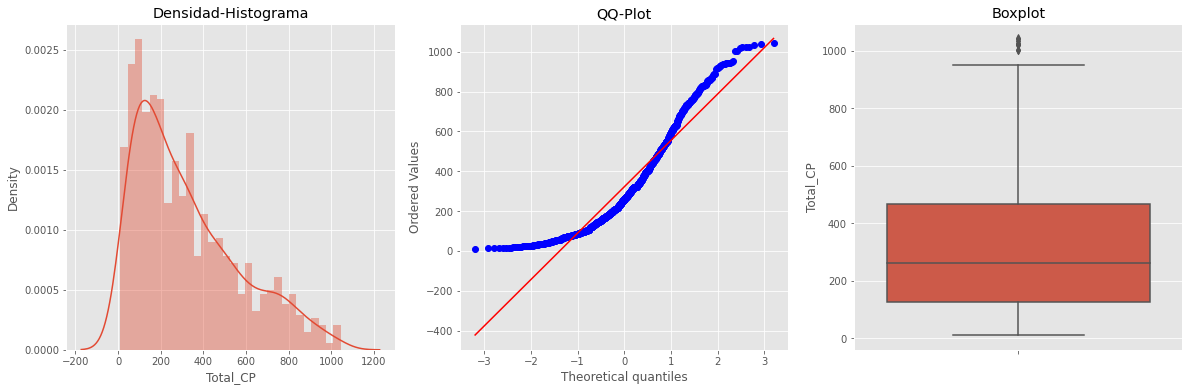

In [75]:
detect_outliers(dataNA, 'Total_CP')

### Tratamiento outliers - Variable Gross Income

In [76]:
dataNA['gross_income_CP'] = np.where(dataNA['gross income_media'] > LS_GI, LS_GI, 
                          np.where(dataNA['gross income_media'] < LI_GI, LI_GI, dataNA['gross income_media']))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


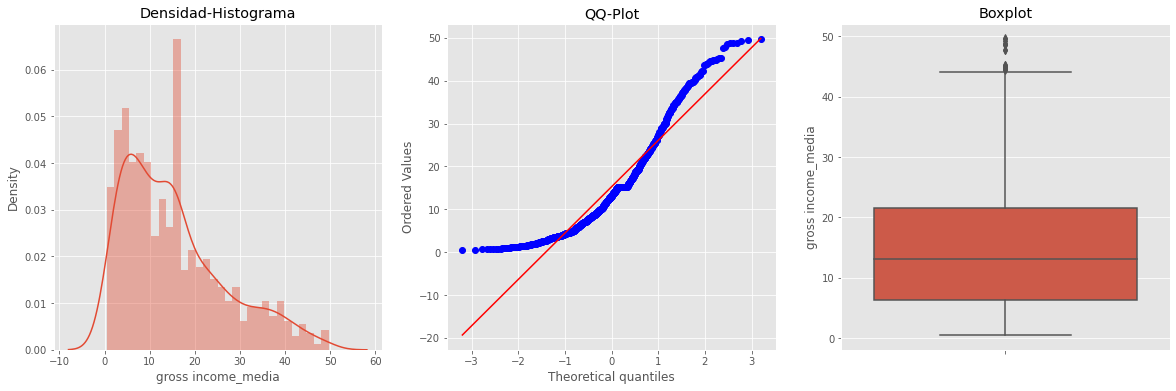

In [77]:
detect_outliers(dataNA, 'gross income_media')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


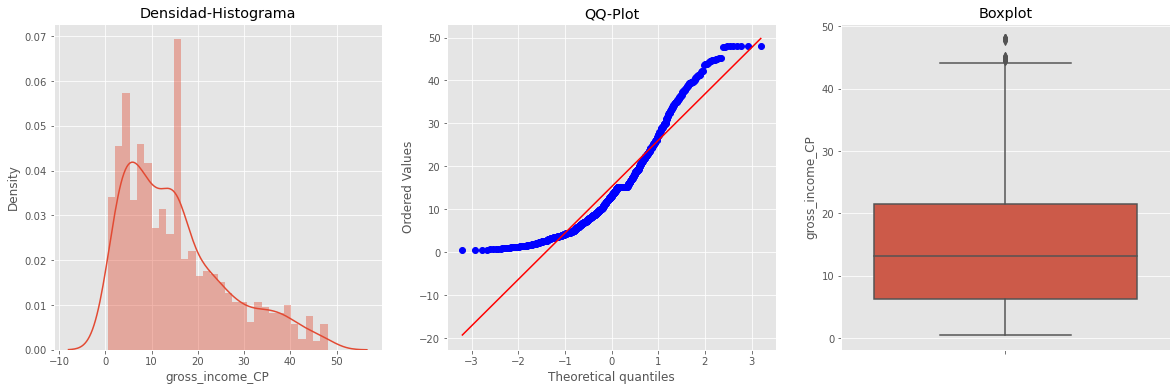

In [78]:
detect_outliers(dataNA, 'gross_income_CP')

### Tratamiento outliers - Variable Unit price

In [79]:
dataNA['Unit_price_CP'] = np.where(dataNA['Unit price'] > LS_UP, LS_UP, 
                          np.where(dataNA['Unit price'] < LI_UP, LI_UP, dataNA['Unit price']))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


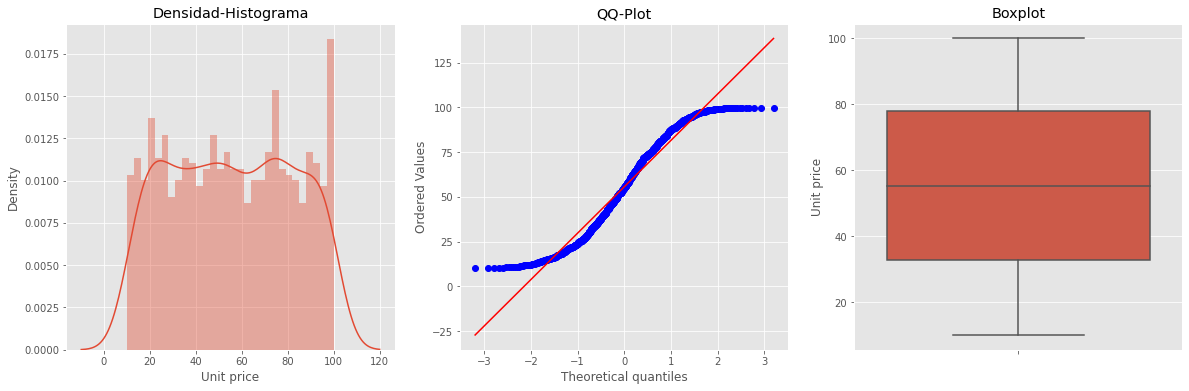

In [80]:
detect_outliers(dataNA, 'Unit price')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


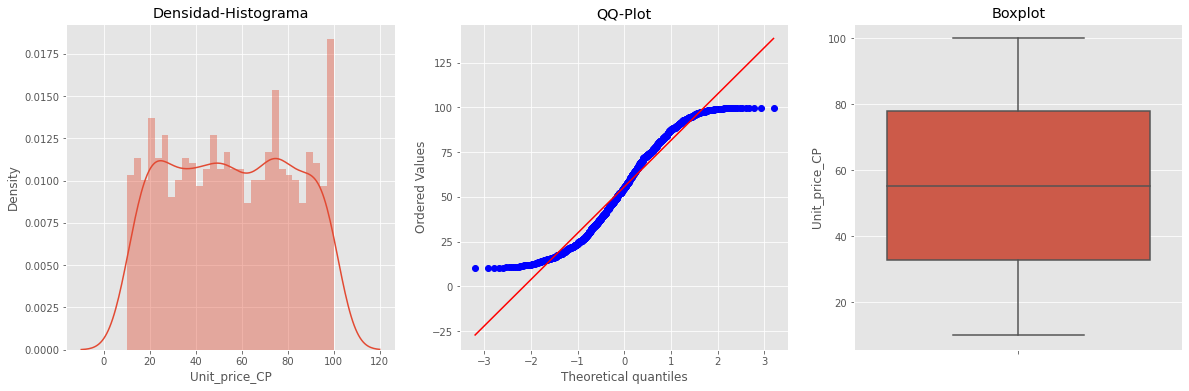

In [81]:
detect_outliers(dataNA, 'Unit_price_CP')

### Tratamiento outliers - Variable Rating

In [82]:
dataNA['Rating_CP'] = np.where(dataNA['Rating_fun'] > LS_R, LS_R, 
                          np.where(dataNA['Rating_fun'] < LI_R, LI_R, dataNA['Rating_fun']))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


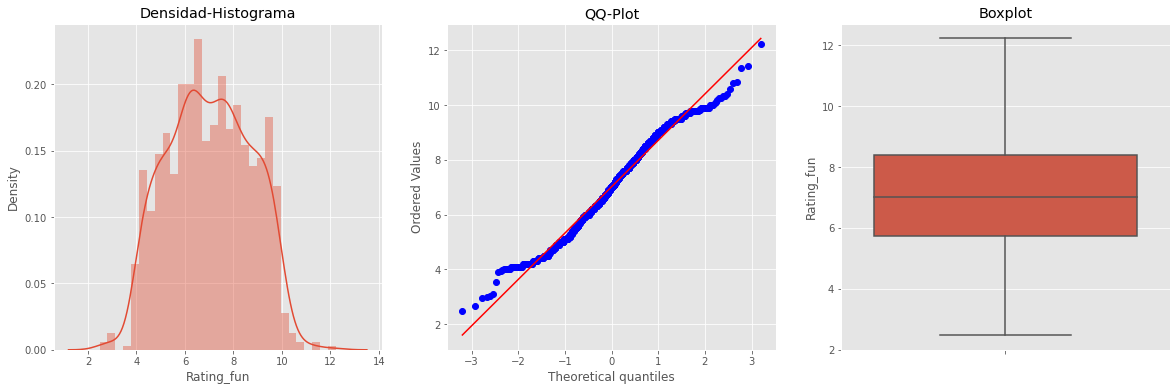

In [83]:
detect_outliers(dataNA, 'Rating_fun')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


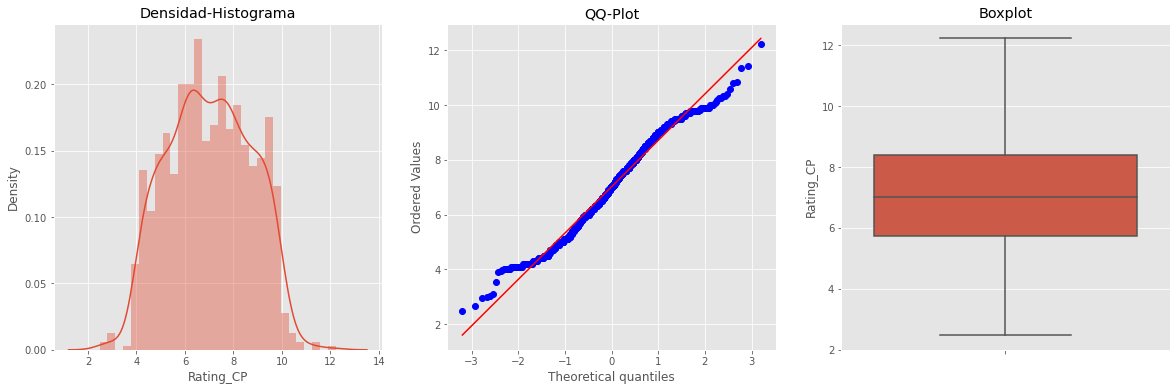

In [84]:
detect_outliers(dataNA, 'Rating_CP')

## Feature Scaling

In [85]:
dataFS = dataNA[['Quantity_fun', 'Total_media', 'gross income_media', 'Rating_fun']]
dataFS.head()

,Quantity_fun,Total_media,gross income_media,Rating_fun
0,7.0,548.971500,26.141500,9.1
1,5.0,80.220000,3.820000,7.4
2,7.0,340.525500,16.215500,8.4
3,7.0,489.048000,23.288000,5.9
4,7.0,322.404011,15.267117,4.5


In [86]:
dataFS.describe()

,Quantity_fun,Total_media,gross income_media,Rating_fun
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.599585,322.404011,15.267117,7.019440
std,2.948803,243.353967,11.288780,1.702634
min,-3.849328,10.678500,0.508500,2.480194
25%,3.000000,125.713875,6.285750,5.725996
50%,6.000000,260.484000,13.113000,7.000000
75%,8.000000,466.436250,21.481500,8.400000
max,15.199839,1042.650000,49.650000,12.221008


In [87]:
# Creacion objeto scaler
scaler = StandardScaler()

# Scaler para cada columna
scaler.fit(dataFS)    

dataFS_scaled = scaler.transform(dataFS)
dataFS_scaled = pd.DataFrame(dataFS_scaled, columns= dataFS.columns)
dataFS_scaled.head()

,Quantity_fun,Total_media,gross income_media,Rating_fun
0,0.475147,9.314862e-01,9.637732e-01,1.222577
1,-0.203433,-9.956903e-01,-1.014533e+00,0.223625
2,0.475147,7.450282e-02,8.405311e-02,0.811244
3,0.475147,6.851229e-01,7.108736e-01,-0.657804
4,0.475147,4.674003e-16,-1.574347e-16,-1.480471


In [88]:
np.round(dataFS_scaled.describe(), 0)

,Quantity_fun,Total_media,gross income_media,Rating_fun
count,1000.0,1000.0,1000.0,1000.0
mean,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-3.0,-1.0,-1.0,-3.0
25%,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0
max,3.0,3.0,3.0,3.0


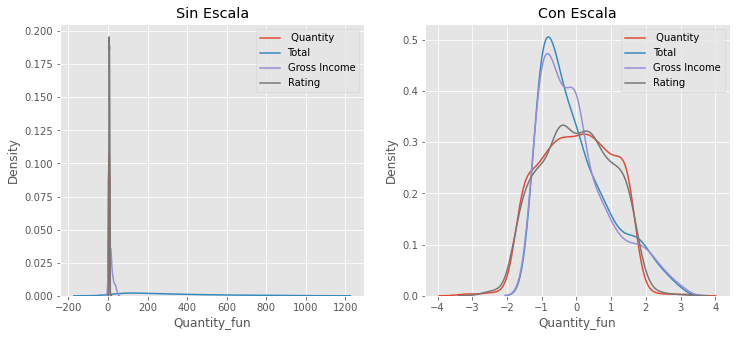

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Sin Escala")
sns.kdeplot(dataFS['Quantity_fun'], ax=ax1, label=" Quantity")
sns.kdeplot(dataFS['Total_media'], ax=ax1, label="Total")
sns.kdeplot(dataFS['gross income_media'], ax=ax1, label="Gross Income")
sns.kdeplot(dataFS['Rating_fun'], ax=ax1, label="Rating")

ax2.set_title("Con Escala")
sns.kdeplot(dataFS_scaled ['Quantity_fun'], ax=ax2, label=" Quantity")
sns.kdeplot(dataFS_scaled ['Total_media'], ax=ax2, label="Total")
sns.kdeplot(dataFS_scaled ['gross income_media'], ax=ax2, label="Gross Income")
sns.kdeplot(dataFS_scaled ['Rating_fun'], ax=ax2, label="Rating")

ax1.legend()
ax2.legend()
plt.show()

In [90]:
dataFS_scaled

,Quantity_fun,Total_media,gross income_media,Rating_fun
0,0.475147,9.314862e-01,9.637732e-01,1.222577
1,-0.203433,-9.956903e-01,-1.014533e+00,0.223625
2,0.475147,7.450282e-02,8.405311e-02,0.811244
3,0.475147,6.851229e-01,7.108736e-01,-0.657804
4,0.475147,4.674003e-16,-1.574347e-16,-1.480471
...,...,...,...,...
995,-0.291522,-1.151313e+00,-1.174285e+00,-1.365478
996,-0.907161,2.878261e+00,2.962198e+00,1.055061
997,-2.042238,4.674003e-16,-1.574347e-16,0.196204
998,-0.940664,-1.041363e+00,-1.061418e+00,-1.050953


In [91]:
dataNA

,Branch,Customer type,Gender,Unit price,Quantity_fun,Total_media,Payment,gross income_media,Rating_fun,Total_CP,gross_income_CP,Unit_price_CP,Rating_CP
0,A,Member,Female,74.69,7.000000,548.971500,Ewallet,26.141500,9.100000,548.971500,26.141500,74.69,9.100000
1,C,Normal,Female,15.28,5.000000,80.220000,Cash,3.820000,7.400000,80.220000,3.820000,15.28,7.400000
2,A,Normal,Male,46.33,7.000000,340.525500,Credit card,16.215500,8.400000,340.525500,16.215500,46.33,8.400000
3,A,Member,Male,58.22,7.000000,489.048000,Ewallet,23.288000,5.900000,489.048000,23.288000,58.22,5.900000
4,A,Member,Female,86.31,7.000000,322.404011,Cash,15.267117,4.500000,322.404011,15.267117,86.31,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A,Normal,Male,40.35,4.740374,42.367500,Ewallet,2.017500,4.695693,42.367500,2.017500,40.35,4.695693
996,A,Normal,Female,97.38,2.925883,1022.490000,Cash,48.690000,8.814924,1022.490000,48.074062,97.38,8.814924
997,A,Member,Female,31.84,-0.419561,322.404011,Cash,15.267117,7.353337,322.404011,15.267117,31.84,7.353337
998,A,Normal,Male,65.82,2.827140,69.111000,Cash,3.291000,5.230946,69.111000,3.291000,65.82,5.230946


In [92]:
dataNA = pd.concat([dataFS_scaled['Quantity_fun'],
                    dataFS_scaled['Total_media'],
                    dataFS_scaled['gross income_media'],
                    dataFS_scaled['Rating_fun'],
                    pd.get_dummies(dataNA['Branch']), 
                    pd.get_dummies(dataNA['Customer type']), 
                    pd.get_dummies(dataNA['Gender']),
                    pd.get_dummies(dataNA['Payment'])], axis=1)
dataNA.head()

,Quantity_fun,Total_media,gross income_media,Rating_fun,A,B,C,Member,Normal,Female,Male,Cash,Credit card,Ewallet
0,0.475147,9.314862e-01,9.637732e-01,1.222577,1,0,0,1,0,1,0,0,0,1
1,-0.203433,-9.956903e-01,-1.014533e+00,0.223625,0,0,1,0,1,1,0,1,0,0
2,0.475147,7.450282e-02,8.405311e-02,0.811244,1,0,0,0,1,0,1,0,1,0
3,0.475147,6.851229e-01,7.108736e-01,-0.657804,1,0,0,1,0,0,1,0,0,1
4,0.475147,4.674003e-16,-1.574347e-16,-1.480471,1,0,0,1,0,1,0,1,0,0


In [93]:
dataNA = dataNA.drop(['Normal','Male'], axis=1)
dataNA

,Quantity_fun,Total_media,gross income_media,Rating_fun,A,B,C,Member,Female,Cash,Credit card,Ewallet
0,0.475147,9.314862e-01,9.637732e-01,1.222577,1,0,0,1,1,0,0,1
1,-0.203433,-9.956903e-01,-1.014533e+00,0.223625,0,0,1,0,1,1,0,0
2,0.475147,7.450282e-02,8.405311e-02,0.811244,1,0,0,0,0,0,1,0
3,0.475147,6.851229e-01,7.108736e-01,-0.657804,1,0,0,1,0,0,0,1
4,0.475147,4.674003e-16,-1.574347e-16,-1.480471,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.291522,-1.151313e+00,-1.174285e+00,-1.365478,1,0,0,0,0,0,0,1
996,-0.907161,2.878261e+00,2.962198e+00,1.055061,1,0,0,0,1,1,0,0
997,-2.042238,4.674003e-16,-1.574347e-16,0.196204,1,0,0,1,1,1,0,0
998,-0.940664,-1.041363e+00,-1.061418e+00,-1.050953,1,0,0,0,0,1,0,0


## Selección de Variables

In [94]:
dataNA

,Quantity_fun,Total_media,gross income_media,Rating_fun,A,B,C,Member,Female,Cash,Credit card,Ewallet
0,0.475147,9.314862e-01,9.637732e-01,1.222577,1,0,0,1,1,0,0,1
1,-0.203433,-9.956903e-01,-1.014533e+00,0.223625,0,0,1,0,1,1,0,0
2,0.475147,7.450282e-02,8.405311e-02,0.811244,1,0,0,0,0,0,1,0
3,0.475147,6.851229e-01,7.108736e-01,-0.657804,1,0,0,1,0,0,0,1
4,0.475147,4.674003e-16,-1.574347e-16,-1.480471,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.291522,-1.151313e+00,-1.174285e+00,-1.365478,1,0,0,0,0,0,0,1
996,-0.907161,2.878261e+00,2.962198e+00,1.055061,1,0,0,0,1,1,0,0
997,-2.042238,4.674003e-16,-1.574347e-16,0.196204,1,0,0,1,1,1,0,0
998,-0.940664,-1.041363e+00,-1.061418e+00,-1.050953,1,0,0,0,0,1,0,0


In [95]:
corr_df = dataNA.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,Quantity_fun,Total_media,gross income_media,Rating_fun,A,B,C,Member,Female,Cash,Credit card,Ewallet
Quantity_fun,1.000000,-0.004864,0.010445,-0.007025,0.030197,-0.013727,-0.018942,-0.041781,-0.003253,-0.021097,0.023294,0.002019
Total_media,-0.004864,1.000000,0.962124,-0.002686,-0.032416,0.010121,0.024930,0.014096,0.064653,-0.001461,0.011273,-0.009298
gross income_media,0.010445,0.962124,1.000000,0.001622,-0.028724,0.011612,0.019458,0.008414,0.060777,-0.019491,0.021437,0.001948
Rating_fun,-0.007025,-0.002686,0.001622,1.000000,0.006604,0.007281,-0.014385,0.072022,0.064594,-0.020718,0.037296,-0.012106
A,0.030197,-0.032416,-0.028724,0.006604,1.000000,-0.538486,-0.543711,-0.004838,-0.016886,-0.010723,-0.039601,0.051283
B,-0.013727,0.010121,0.011612,0.007281,-0.538486,1.000000,-0.414419,-0.003527,-0.030249,-0.007052,0.031781,-0.022769
C,-0.018942,0.024930,0.019458,-0.014385,-0.543711,-0.414419,1.000000,0.008738,0.048367,0.018604,0.011116,-0.032711
Member,-0.041781,0.014096,0.008414,0.072022,-0.004838,-0.003527,0.008738,1.000000,0.013389,-0.004123,0.047031,-0.041108
Female,-0.003253,0.064653,0.060777,0.064594,-0.016886,-0.030249,0.048367,0.013389,1.000000,0.000987,0.031091,-0.031535
Cash,-0.021097,-0.001461,-0.019491,-0.020718,-0.010723,-0.007052,0.018604,-0.004123,0.000987,1.000000,-0.581241,-0.606591


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


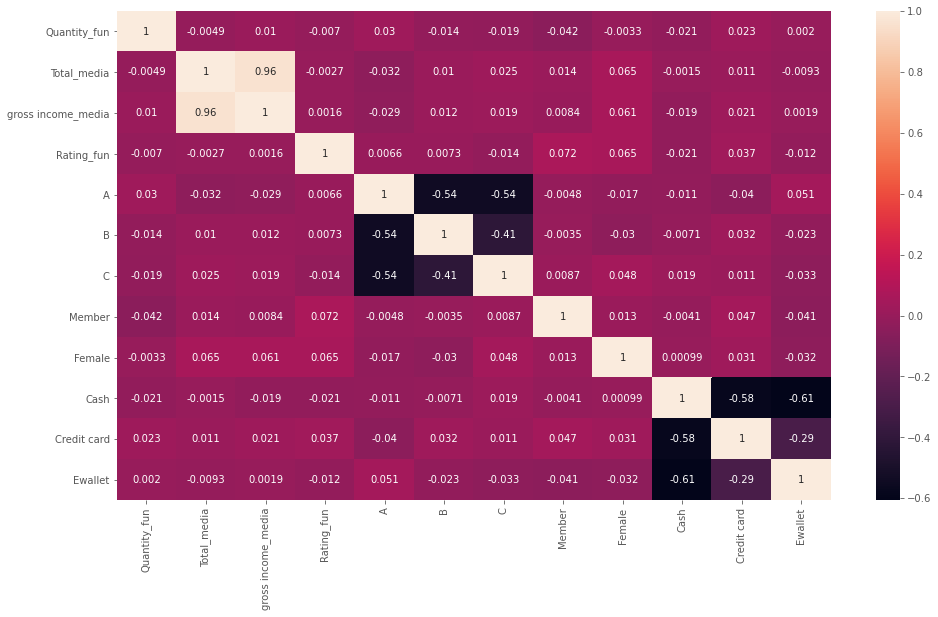

In [179]:
correlation_mat = dataNA.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

## Desarrollo de modelo de clasificación

### Split dataset

In [187]:
X = dataNA[['Quantity_fun', 'Total_media', 'gross income_media','Rating_fun','A','B','C','Female','Cash', 'Credit card', 'Ewallet']]
y = dataNA['Member']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [188]:
X = dataNA.drop('Member', axis=1)
y = dataNA.Member

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021, shuffle=True)


### Regresión Logística

In [98]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

y_pred = algoritmo.predict(X_test)

In [100]:
# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Puntaje del modelo
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje del modelo:')
print(puntajef1)

#Curva ROC - AUC del modelo
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)


Matriz de Confusión:
[[ 12 132]
 [ 10 146]]
Precisión del modelo:
0.5251798561151079
Exactitud del modelo:
0.5266666666666666
Sensibilidad del modelo:
0.9358974358974359
Puntaje del modelo:
0.672811059907834
Curva ROC - AUC del modelo:
0.5096153846153846


### Naive Bayes

X = dataFS_scaled.drop('Rating_fun', axis=1)
y =dataFS_scaled.Rating_fun

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021, shuffle=True)

In [101]:
stdScaler = StandardScaler()
stdScaler.fit(X_train)
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [102]:
clf_NB = GaussianNB()
clf_NB

GaussianNB()

In [103]:
#Entrenando el modelo Naive-Bayes
clf_NB.fit(X_train_std, y_train)

GaussianNB()

In [104]:
y_pred = clf_NB.predict(X_test_std)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], d

In [105]:
# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Puntaje del modelo
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje del modelo:')
print(puntajef1)

#Curva ROC - AUC del modelo
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[ 32 112]
 [ 38 118]]
Precisión del modelo:
0.5130434782608696
Exactitud del modelo:
0.5
Sensibilidad del modelo:
0.7564102564102564
Puntaje del modelo:
0.6113989637305699
Curva ROC - AUC del modelo:
0.4893162393162393


In [106]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.5


In [107]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_pred, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción    0    1
Observación         
0            32  112
1            38  118


### Ensamble

In [189]:
lr = 'LogisticRegression().fit(X_train, y_train)'
svm = 'SVC(gamma="scale", kernel="linear").fit(X_train, y_train)'
dt = 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)'
knn = 'KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)'
nb = 'GaussianNB().fit(X_train, y_train)'
lda = 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)'
qda = 'QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)'
rf = 'RandomForestClassifier(n_estimators=50).fit(X_train, y_train)'

model_list = {'lr': lr, 
              'svm': svm,
              'dt': dt,
              'knn': knn,
              'nb': nb,
              'lda': lda,
              'qda': qda,
              'rf': rf}

model_list

{'lr': 'LogisticRegression().fit(X_train, y_train)',
 'svm': 'SVC(gamma="scale", kernel="linear").fit(X_train, y_train)',
 'dt': 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)',
 'knn': 'KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)',
 'nb': 'GaussianNB().fit(X_train, y_train)',
 'lda': 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)',
 'qda': 'QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)',
 'rf': 'RandomForestClassifier(n_estimators=50).fit(X_train, y_train)'}

In [190]:
trainSet = pd.concat([X_train, y_train], axis=1)
trainSet.head()

,Quantity_fun,Total_media,gross income_media,Rating_fun,A,B,C,Female,Cash,Credit card,Ewallet,Member
853,1.075896,9.533727e-01,-1.574347e-16,-0.691775,0,1,0,1,1,0,0,0
27,-0.203433,-5.685801e-01,-5.760915e-01,0.634958,1,0,0,1,1,0,0,0
303,1.493018,-4.415780e-01,-4.457199e-01,0.987530,1,0,0,1,0,1,0,0
60,-1.221304,-1.005101e+00,-1.574347e-16,-1.715519,0,0,1,1,1,0,0,1
939,1.008145,4.674003e-16,1.701551e-01,-0.861027,0,0,1,1,1,0,0,0


In [191]:
train_models_list = {}

for model_name, model in model_list.items():
    sample = resample(trainSet, replace=True, n_samples=200)
    X_train = sample.drop('Member', axis=1)
    y_train = sample.Member
    train_model = eval(model)
    train_models_list[model_name] = train_model

train_models_list

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'lr': LogisticRegression(),
 'svm': SVC(kernel='linear'),
 'dt': DecisionTreeClassifier(max_depth=4),
 'knn': KNeighborsClassifier(n_neighbors=7),
 'nb': GaussianNB(),
 'lda': LinearDiscriminantAnalysis(store_covariance=True),
 'qda': QuadraticDiscriminantAnalysis(store_covariance=True),
 'rf': RandomForestClassifier(n_estimators=50)}

In [192]:
acc_scores = {}
auc_roc_scores = {}

result_matrix = pd.DataFrame(columns=np.arange(0, len(y_test), 1))

for model_name, train_model in train_models_list.items():
    predicciones = train_model.predict(X_test)
    acc = accuracy_score(y_test, predicciones)
    aucroc = roc_auc_score(y_test, predicciones)
    acc_scores[model_name] = acc
    auc_roc_scores[model_name] = aucroc
    tempDf = pd.DataFrame(predicciones).T
    result_matrix = result_matrix.append(tempDf)

result_matrix.index = list(train_models_list.keys())

In [193]:
acc_scores

{'lr': 0.4666666666666667,
 'svm': 0.49666666666666665,
 'dt': 0.43,
 'knn': 0.52,
 'nb': 0.5033333333333333,
 'lda': 0.48,
 'qda': 0.51,
 'rf': 0.52}

In [194]:
result_matrix

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
lr,0,0,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,1,1
svm,0,0,1,0,1,1,1,1,1,1,...,0,1,0,1,1,0,1,0,1,0
dt,1,0,0,1,0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
knn,1,1,1,1,1,1,0,0,1,0,...,1,1,0,0,0,1,0,1,1,1
nb,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
lda,0,0,1,1,1,1,1,1,1,1,...,0,1,1,1,0,0,1,0,1,1
qda,0,0,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,1,0,1,1
rf,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,0,0,0,0,1,1


In [195]:
votacion = result_matrix.apply(pd.value_counts)
votacion

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,4,6,1,3,1,1,2,3,3,2,...,5,3,4,1,5,7,4,5,2,2
1,4,2,7,5,7,7,6,5,5,6,...,3,5,4,7,3,1,4,3,6,6


In [196]:
final_predict = []

for columnName, columnData in votacion.iteritems():
    column_result = columnData.values
    final_predict.append(np.nanargmax(column_result, axis=0))
    
#final_predict

In [197]:
accEnsamble = accuracy_score(y_test, final_predict)
aucrocEnsamble = roc_auc_score(y_test, final_predict)
aucrocEnsamble

0.49065170940170943

In [198]:
auc_roc_scores

{'lr': 0.4545940170940171,
 'svm': 0.49252136752136755,
 'dt': 0.42868589743589747,
 'knn': 0.5194978632478632,
 'nb': 0.5021367521367521,
 'lda': 0.46981837606837606,
 'qda': 0.500534188034188,
 'rf': 0.516559829059829}

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


### SVM

In [142]:
#Objeto standardScaler()
stdScaler = StandardScaler()

#Fit calcula quién es la media, desviación estándar de cada columna para poder hacer los cálculos de la transformación
stdScaler.fit(X_train)
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

In [143]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [144]:
svm = SVC(kernel="linear", C=1.0)
svm

SVC(kernel='linear')

In [145]:
svm.fit(X_train_std, y_train)

SVC(kernel='linear')

In [146]:
y_pred_svm = svm.predict(X_test_std)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [147]:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Accuracy:  0.52


In [148]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_pred_svm, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción     1
Observación     
0            144
1            156


In [149]:
scores = cross_val_score(svm, X_test_std, y_test, cv=10)
np.mean(scores)

0.4766666666666667

In [150]:
scores = cross_val_score(svm, X_combined_std, y_combined, cv=10)
np.mean(scores)

0.556

### Arboles de decisión

In [151]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

In [152]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [153]:
dt.predict(X_test_std[0, :].reshape(1,-1))

array([1], dtype=uint8)

In [154]:
X_test_std[0, :]

array([ 0.55126374,  0.73747431,  0.7698324 , -0.58301463,  1.22474487,
       -0.67028006, -0.63910148, -1.1055416 , -1.1055416 , -0.51558005,
        1.77951304])

In [155]:
y_preds = dt.predict(X_test_std)
y_preds

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1], d

In [156]:
accuracy_score(y_test, y_preds)

0.5266666666666666

In [157]:
confusion_matrix(y_test, y_preds)

array([[68, 76],
       [66, 90]], dtype=int64)

In [158]:
cv_score = cross_val_score(dt, X, y, cv=10)
cv_score

array([0.51, 0.45, 0.49, 0.47, 0.5 , 0.43, 0.53, 0.52, 0.47, 0.5 ])

In [159]:
cv_score.mean()

0.487

## Random Forest

In [199]:
X = dataNA[['Quantity_fun', 'Total_media', 'gross income_media','Rating_fun','A','B','C','Female','Cash', 'Credit card', 'Ewallet']]
y = dataNA['Member']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

X_train_RF = stdScaler.transform(X_train)
X_test_RF = stdScaler.transform(X_test)

In [200]:
# Importar el modelo que se va a utilizar
from sklearn.ensemble import RandomForestRegressor

# Instanciar el modelo con 100 árboles de decisión
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Entrenar el modelo con la data Train
rf.fit(X_train_RF, y_train);

In [201]:
y_predRF = rf.predict(X_test_RF)
y_predRF

array([0.82, 0.71, 0.42, 0.35, 0.73, 0.7 , 0.68, 0.53, 0.81, 0.58, 0.39,
       0.71, 0.5 , 0.54, 0.67, 0.37, 0.61, 0.71, 0.62, 0.49, 0.78, 0.27,
       0.44, 0.44, 0.89, 0.71, 0.61, 0.67, 0.77, 0.39, 0.48, 0.78, 0.37,
       0.55, 0.5 , 0.23, 0.47, 0.83, 0.78, 0.76, 0.44, 0.73, 0.65, 0.77,
       0.54, 0.5 , 0.67, 0.82, 0.15, 0.44, 0.76, 0.57, 0.32, 0.55, 0.56,
       0.7 , 0.44, 0.66, 0.86, 0.85, 0.55, 0.39, 0.92, 0.23, 0.46, 0.49,
       0.72, 0.67, 0.74, 0.53, 0.42, 0.68, 0.5 , 0.71, 0.71, 0.56, 0.43,
       0.68, 0.46, 0.16, 0.6 , 0.94, 0.7 , 0.4 , 0.44, 0.49, 0.57, 0.18,
       0.49, 0.54, 0.73, 0.54, 0.62, 0.72, 0.45, 0.76, 0.15, 0.47, 0.63,
       0.49, 0.42, 0.58, 0.47, 0.82, 0.46, 0.3 , 0.39, 0.57, 0.54, 0.68,
       0.68, 0.74, 0.47, 0.36, 0.52, 0.5 , 0.74, 0.64, 0.64, 0.58, 0.76,
       0.55, 0.31, 0.63, 0.86, 0.84, 0.78, 0.75, 0.37, 0.6 , 0.29, 0.39,
       0.57, 0.46, 0.73, 0.84, 0.69, 0.51, 0.22, 0.56, 0.21, 0.78, 0.64,
       0.93, 0.75, 0.64, 0.29, 0.32, 0.52, 0.48, 0.

In [202]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_predRF, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción   0.15  0.16  0.18  0.19  0.20  0.21  0.22  0.23  0.27  0.29  ...  \
Observación                                                              ...   
0               0     1     0     1     0     0     0     2     1     1  ...   
1               2     0     1     0     1     1     1     0     1     1  ...   

Predicción   0.82  0.83  0.84  0.85  0.86  0.88  0.89  0.92  0.93  0.94  
Observación                                                              
0               4     2     0     1     1     1     1     0     0     1  
1               1     1     3     3     2     1     1     1     1     0  

[2 rows x 72 columns]


In [203]:
errors = abs(y_predRF - y_test)
print('Accuracy:', np.mean(errors))

Accuracy: 0.4976666666666664


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


## Análisis de Discriminante Lineal LDA

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [115]:
X = dataNA[['Quantity_fun', 'Total_media', 'gross income_media','Rating_fun','A','B','C','Female','Cash', 'Credit card', 'Ewallet']]
y = dataNA['Member']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

X_train_LDA = stdScaler.transform(X_train)
X_test_LDA = stdScaler.transform(X_test)

In [116]:
clf_ldaLDA = LinearDiscriminantAnalysis()
clf_ldaLDA.fit(X_train_LDA, y_train)

LinearDiscriminantAnalysis()

In [117]:
y_predLDA = clf_ldaLDA.predict(X_test_LDA)
y_predLDA

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], d

In [118]:
print("Accuracy: ", accuracy_score(y_test, y_predLDA))

Accuracy:  0.53


In [119]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_predLDA, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción    0    1
Observación         
0            13  131
1            10  146


## Análisis de Discriminante Cuadrático QDA

In [120]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [121]:
X = dataNA[['Quantity_fun', 'Total_media', 'gross income_media','Rating_fun','A','B','C','Female','Cash', 'Credit card', 'Ewallet']]
y = dataNA['Member']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

X_train_QDA = stdScaler.transform(X_train)
X_test_QDA = stdScaler.transform(X_test)

In [122]:
clf_ldaQDA = QuadraticDiscriminantAnalysis()
clf_ldaQDA.fit(X_train_QDA, y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [123]:
y_predQDA = clf_ldaQDA.predict(X_test_QDA)
y_predQDA

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], d

In [124]:
print("Accuracy: ", accuracy_score(y_test, y_predQDA))

Accuracy:  0.47


In [125]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_predQDA, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción     0   1
Observación         
0             90  54
1            105  51


## AdaBoost

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
X = dataNA[['Quantity_fun', 'Total_media', 'gross income_media','Rating_fun','A','B','C','Female','Cash', 'Credit card', 'Ewallet']]
y = dataNA['Member']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

X_train_AB = stdScaler.transform(X_train)
X_test_AB = stdScaler.transform(X_test)

In [128]:
clf_ldaAB = AdaBoostClassifier()
clf_ldaAB.fit(X_train_AB, y_train)

AdaBoostClassifier()

In [129]:
y_predAB = clf_ldaAB.predict(X_test_AB)
y_predAB

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], d

In [130]:
print("Accuracy: ", accuracy_score(y_test, y_predAB))

Accuracy:  0.5


In [131]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_predAB, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción    0    1
Observación         
0            29  115
1            35  121


## Modelo Final

### Modelo ganador = LDA

In [204]:
print("Accuracy: ", accuracy_score(y_test, y_predLDA))

Accuracy:  0.53


In [205]:
print("Matriz de Confusion: \n\n", pd.crosstab(y_test, y_predLDA, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción    0    1
Observación         
0            13  131
1            10  146
